# COGS 108 - Final Project (Group 7)

# Overview

*Fill in your overview here*

# Names and Members IDs

- Purisa Jasmine Simmons - A12802561
- Eryue Xu - A15122722
- Bar Yosef - A13368857
- Jing Lang - A14906233
- Sao I Chan - A15720032
- Jasmine Palafox - A14052116


# Research Question

The main question that we would like to explore is:
What is the relationship between an adult population’s awareness of climate change and
the amount of greenhouse gases released by that population’s region?
In order to develop an answer this question, we will also explore the following sub-questions:
- How does public awareness of climate change vary by state within the U.S.?
- How have greenhouse gas emissions in the United States changed over time, using data
collected from the following years: 2014, 2016, 2018?
- Does a state’s overall political lean (more Democrat or Republican) affect that state’s adult
population’s concern for climate change?
- On a global scale, how do greenhouse gas emissions vary by country? Is there a correlation
between a country’s greenhouse gas emissions and their awareness of climate change?

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


We hypothesize that regions with a greater awareness of climate change will produce lower
amounts of greenhouse gases emissions, when compared to regions with lesser degrees of
climate change awareness, especially when the industrialization of the region under study is
controlled for. This hypothesis is based on the idea that a public awareness of climate change
would cause local governments to produce policy that addresses climate change by regulating
greenhouse gas emissions (Bord, O’Connor, & Fisher, 2000).

# Dataset(s)

We have nine datasets that we are using in our final project. We will analyze the data contained in these nine datasets in order to guide the analysis of our research questions.

Dataset 1
- Dataset Name: YPCCC_2014_State.csv
- Link to the dataset: https://climatecommunication.yale.edu/visualizations-data/ycom/
- Number of observations: 51 states

Dataset 2

- Dataset Name: YCOM_2016.csv
- Link to the dataset: https://climatecommunication.yale.edu/visualizations-data/ycom-us-2016/?est=happening&type=value&geo=county
- Number of observations: 51 states

Dataset 3

- Dataset Name: YCOM_2018.csv
- Link to the dataset: https://climatecommunication.yale.edu/visualizations-data/ycom-us-2018/?est=happening&type=value&geo=county
- Number of observations: 51 states

These thress datasets come from the study on climate change awareness conducted by the Yale Program on Climate Change Communication. It gives us information related to a geographic variation in opinions of climate change, organized at the level of county and/or state including the following categories: beliefs, risk perceptions, policy support, behaviors, awareness, worried, etc.

Dataset 4

- Dataset Name: Carbon_dioxide_emission_by_state.xlsx
- Link to the dataset: https://www.eia.gov/environment/emissions/state/analysis/
- Number of observations: 51 states

This dataset contains the data related to the carbon dioxide emission level by state from 2005 to 2016. 

Dataset 5

- Dataset Name: State_Party_Affiliation_2014.csv
- Link to the dataset: https://www.pewforum.org/religious-landscape-study/compare/party-affiliation/by/state/
- Number of observations: 51 states * 4 columns = 204 observations

This dataset contains information related to the political party affiliation of each state in 2014 based on a subsample of each state's population. 

Dataset 6

- Dataset Name: 2014_State_Size_Population_Density.csv
- Link to the dataset: https://www.states101.com/populations
- Number of observations: 57 states * 3 columns = 171 observations

This dataset contains information for the population, land area in square miles, and population density (people per square mile) of each U.S. state and territory. 

Dataset 7

- Dataset Name: GreenhouseGasInventoryDataUS.csv
- Link to the dataset: https://cfpub.epa.gov/ghgdata/inventoryexplorer/
- Number of observations: We have 27 years data

This dataset contains the total amount of each category of gases in U.S. from 1990 to 2017 including carbon dioxide, methane, nitrous oxide, and fluorinated gases. 

Dataset 8

- Dataset Name: annual_co2_emissions_per_country.csv
- Link to the dataset: https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions#per-capita-co2-emiss
- Number of observations: For each country, there are 265 years data is collected. 

This dataset describes the annual CO2 and other greenhouse gas emissions per country globally, starting from 1751 until 2016, measured in tonnes per year.

Dataset 9

- Dataset Name: awareness_by_percentage.xlsx
- Link to the dataset: https://www.nature.com/articles/nclimate2728
- Number of observations: 119 countries in the dataset

This dataset contains datas that can help us to analyze the relationship between different categories and people's level of awareness of climate change.

# Setup

In [62]:
#install package for geospatial mapping
conda install geopandas

SyntaxError: invalid syntax (<ipython-input-62-ac7d8ab42eb1>, line 2)

In [ ]:
#import libraries that are needed
%matplotlib inline

import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import shapely.geometry as shp

import sklearn.neighbors as skn
import sklearn.metrics as skm

pd.options.display.max_rows = 10

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

In [63]:
#Import Other Necessary Python Libraries:
import math
import operator
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Data Cleaning

Describe your data cleaning steps here.

#### Dataset 1: Read in data about population sentiment per state in 2014 (for Simmons Analysis) 

In [64]:
#File names and datasets 
#YPCCC_2014_State.csv - Yale Study conducted in 2014 w/ population sentiments of climate change
df_YPCCC_2014_State = pd.read_csv("Datasets/YPCCC_2014_State.csv")

#Choose which columns from the original dataset to keep: 
columns_keep = ['Statecode', 'Statename', 'TotalPop', 'happening', 'human', 'worried', 'personal', 'CO2limits', 'regulate', 'fundrenewables']
df_YPCCC_2014_State_new = df_YPCCC_2014_State[columns_keep]

#Drop District of Columbia: 
df_YPCCC_2014_State_new = df_YPCCC_2014_State_new[df_YPCCC_2014_State_new.Statecode != "DC"]
df_YPCCC_2014_State_new

Statecode      Statename  TotalPop  happening  human  worried  personal  \
0         AK         Alaska    447543         62     45       48        29   
1         AL        Alabama   3166424         56     43       46        31   
2         AR       Arkansas   1921039         57     44       47        31   
3         AZ        Arizona   4149955         64     49       54        38   
4         CA     California  24117317         70     55       62        42   
..       ...            ...       ...        ...    ...      ...       ...   
46        VT        Vermont    431581         68     52       57        35   
47        WA     Washington   4507469         68     51       58        37   
48        WI      Wisconsin   3800291         61     48       50        32   
49        WV  West Virginia   1292274         54     43       42        25   
50        WY        Wyoming    371096         55     42       41        25   

    CO2limits  regulate  fundrenewables  
0          48        67              76  
1          53        69              73  
2          59        71              73  
3          64        74              76  
4          72        79              79  
..        ...       ...             ...  
46         69        79              81  
47         69        78              79  
48         66        76              79  
49         43        67              75  
50         43        64              74  

[50 rows x 10 columns]

#### Dataset 2: Read in data about awareness of climate change in 2016

In [65]:
#import dataset
df_YCOM_2016 = pd.read_csv("Datasets/YCOM_2016.csv")

#Specify which columns in 2016 data we would like to keep in the dataframe for our analysis
columns_2016_keep = ['GeoName', 'happening', 'human', 'worried', 'personal', 'CO2limits', 
                     'regulate', 'fundrenewables']
df_YCOM_2016_new = df_YCOM_2016[columns_2016_keep]
df_YCOM_2016_state = df_YCOM_2016_new.loc[0:51]
df_YCOM_2016_state = df_YCOM_2016_state.drop(index = 0)
df_YCOM_2016_state.dropna()
df_YCOM_2016_state = df_YCOM_2016_state[df_YCOM_2016_state.GeoName != "District of Columbia"]
#df_YCOM_2016_state

#### Dataset 3: Read in data about awareness of climate change in 2018

In [66]:
#import dataset
df_YCOM_2018 = pd.read_csv("Datasets/YCOM_2018.csv", encoding='ISO-8859-1')

#### Dataset 4: Read in data about carbon dioxide emission per state (for Simmons Analysis)

In [67]:
#Carbon_dioxide_emission_by_state.xlsx - Carbon Dioxide per state from years 2005-2016
df_CO2_state = pd.read_excel("Datasets/Carbon_dioxide_emission_by_state.xlsx")

#Drop NaN values and rename columns with proper years for 2012, 2014, and 2016 data
col_years = ['State']
for year in list(range(2005, 2017)):
    col_years.append(str(year))

col_years.append('Percent Change')
col_years.append('Absolute')

df_CO2_state.columns=col_years

#Deleting unnecessary rows from beginning, renaming index to be the state names:
new_df_CO2_state = df_CO2_state.iloc[4:55]
new_df_CO2_state = new_df_CO2_state.set_index('State')

#Right now, only concerned with year 2014:
df_CO2_state_2014 = pd.DataFrame(new_df_CO2_state[:]['2014'])
df_CO2_state_2014.columns=(["CO2_Emissions_in_2014"])


#Drop District of Columbia: 
df_CO2_state_2014 = df_CO2_state_2014.drop("District of Columbia", axis=0)
#df_CO2_state_2014

df_CO2_state2 = pd.read_excel("Datasets/Carbon_dioxide_emission_by_state.xlsx", header=4)
df_CO2_state2_dropped = df_CO2_state2.dropna()
## only keep the data from 2012, 2014, 2016
columns_CO2 = ['State',2012, 2014, 2016]
df_CO2_state_keep = df_CO2_state2_dropped[columns_CO2]
df_CO2_state_keep = df_CO2_state_keep.drop(51, axis = 0)
#Drop District of Columbia: 
df_CO2_state_keep = df_CO2_state_keep[df_CO2_state_keep.State != "District of Columbia"]
df_CO2_state_keep.columns = ['State', '2014', '2016', '2018']
#df_CO2_state_keep

#### Dataset 5: Read in data about state party affiliations for 2014 (for Simmons Analysis)

In [68]:
df_party_state = pd.read_csv("Datasets/State_Party_Affiliation_2014.csv")
df_party_state = df_party_state.set_index("State")
df_party_state.columns=["Republican", "No_lean", "Democrat", "Sample_Size"]
df_party_state.Republican = df_party_state.Republican.apply(lambda x: x.replace('%',''))
df_party_state.No_lean = df_party_state.No_lean.apply(lambda x: x.replace('%',''))
df_party_state.Democrat = df_party_state.Democrat.apply(lambda x: x.replace('%',''))
df_party_state

#Drop the district of columbia since it isn't a state: 
df_party_state = df_party_state.drop("District of Columbia")
df_party_state




Republican No_lean Democrat Sample_Size
State                                                
Alabama               52      13       35         511
Alaska                39      29       32         310
Arizona               40      21       39         653
Arkansas              46      16       38         311
California            30      21       49       3,697
...                  ...     ...      ...         ...
Virginia              43      18       39         882
Washington            33      23       44         714
West Virginia         43      16       41         309
Wisconsin             42      16       42         600
Wyoming               57      18       25         316

[50 rows x 4 columns]

#### Dataset 7: Read in data about annual greenhouse gas in US

In [69]:
#import greenhouse gas data
annual_gas_us = pd.read_csv('Datasets/GreenhouseGasInventoryDataUS.csv')

#Dataset in the different orientation
#Transpose the dataset and rename the column
annual_gas_us = annual_gas_us.set_index('Gas').rename_axis(['Year']).transpose().reset_index()
annual_gas_us.rename(columns = {'index' : 'Year'}, inplace = True)

#### Dataset 8: Read in data about annual CO2 emission globally(Yolanda)

In [70]:
#import global CO2 emission data
df_country_emission = pd.read_csv('Datasets/annual_co2_emissions_per_country.csv')

#rename the column and reset the index
df_country_emission = df_country_emission.rename(index=str, columns={"Annual CO₂ emissions (Global Carbon Project (2017)) (tonnes)": "Annual CO₂ emissions(tonnes)"})
df_country_emission.set_index('Entity', inplace=True)

#drop any unavailable or no value data
df_country_emission= df_country_emission.dropna()
df_country_emission= df_country_emission[df_country_emission['Annual CO₂ emissions(tonnes)'] != 0]

df_country_emission.head()

Code  Year  Annual CO₂ emissions(tonnes)
Entity                                              
Afghanistan  AFG  1949                       14680.0
Afghanistan  AFG  1950                       84410.0
Afghanistan  AFG  1951                       91750.0
Afghanistan  AFG  1952                       91750.0
Afghanistan  AFG  1953                      106430.0

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

#### Step \#1: First, we graph the global CO2 emission

In [71]:
#Not sure how to shrink this part
!pip install descartes
!pip install PySAL
!pip install mapclassify

In [72]:
#Read in world map including countries' information
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

country_shapes = world[['geometry', 'iso_a3']]

country_names = world[['name', 'iso_a3']]

# For spatial join
countries = world[['geometry', 'name']]

countries = countries.rename(columns={'name':'country'})

In [73]:
# Read 2008 global data for CO2 emission
df_country_emission_2008 = df_country_emission[df_country_emission['Year'] == 2008]
df_country_emission_2008 = df_country_emission_2008.drop(columns = ['Code','Year'])

In [74]:
#Merge it with the world map data
df_map = df_country_emission_2008.merge(countries, left_on='Entity', right_on='country')
df_geo = GeoDataFrame(df_map)

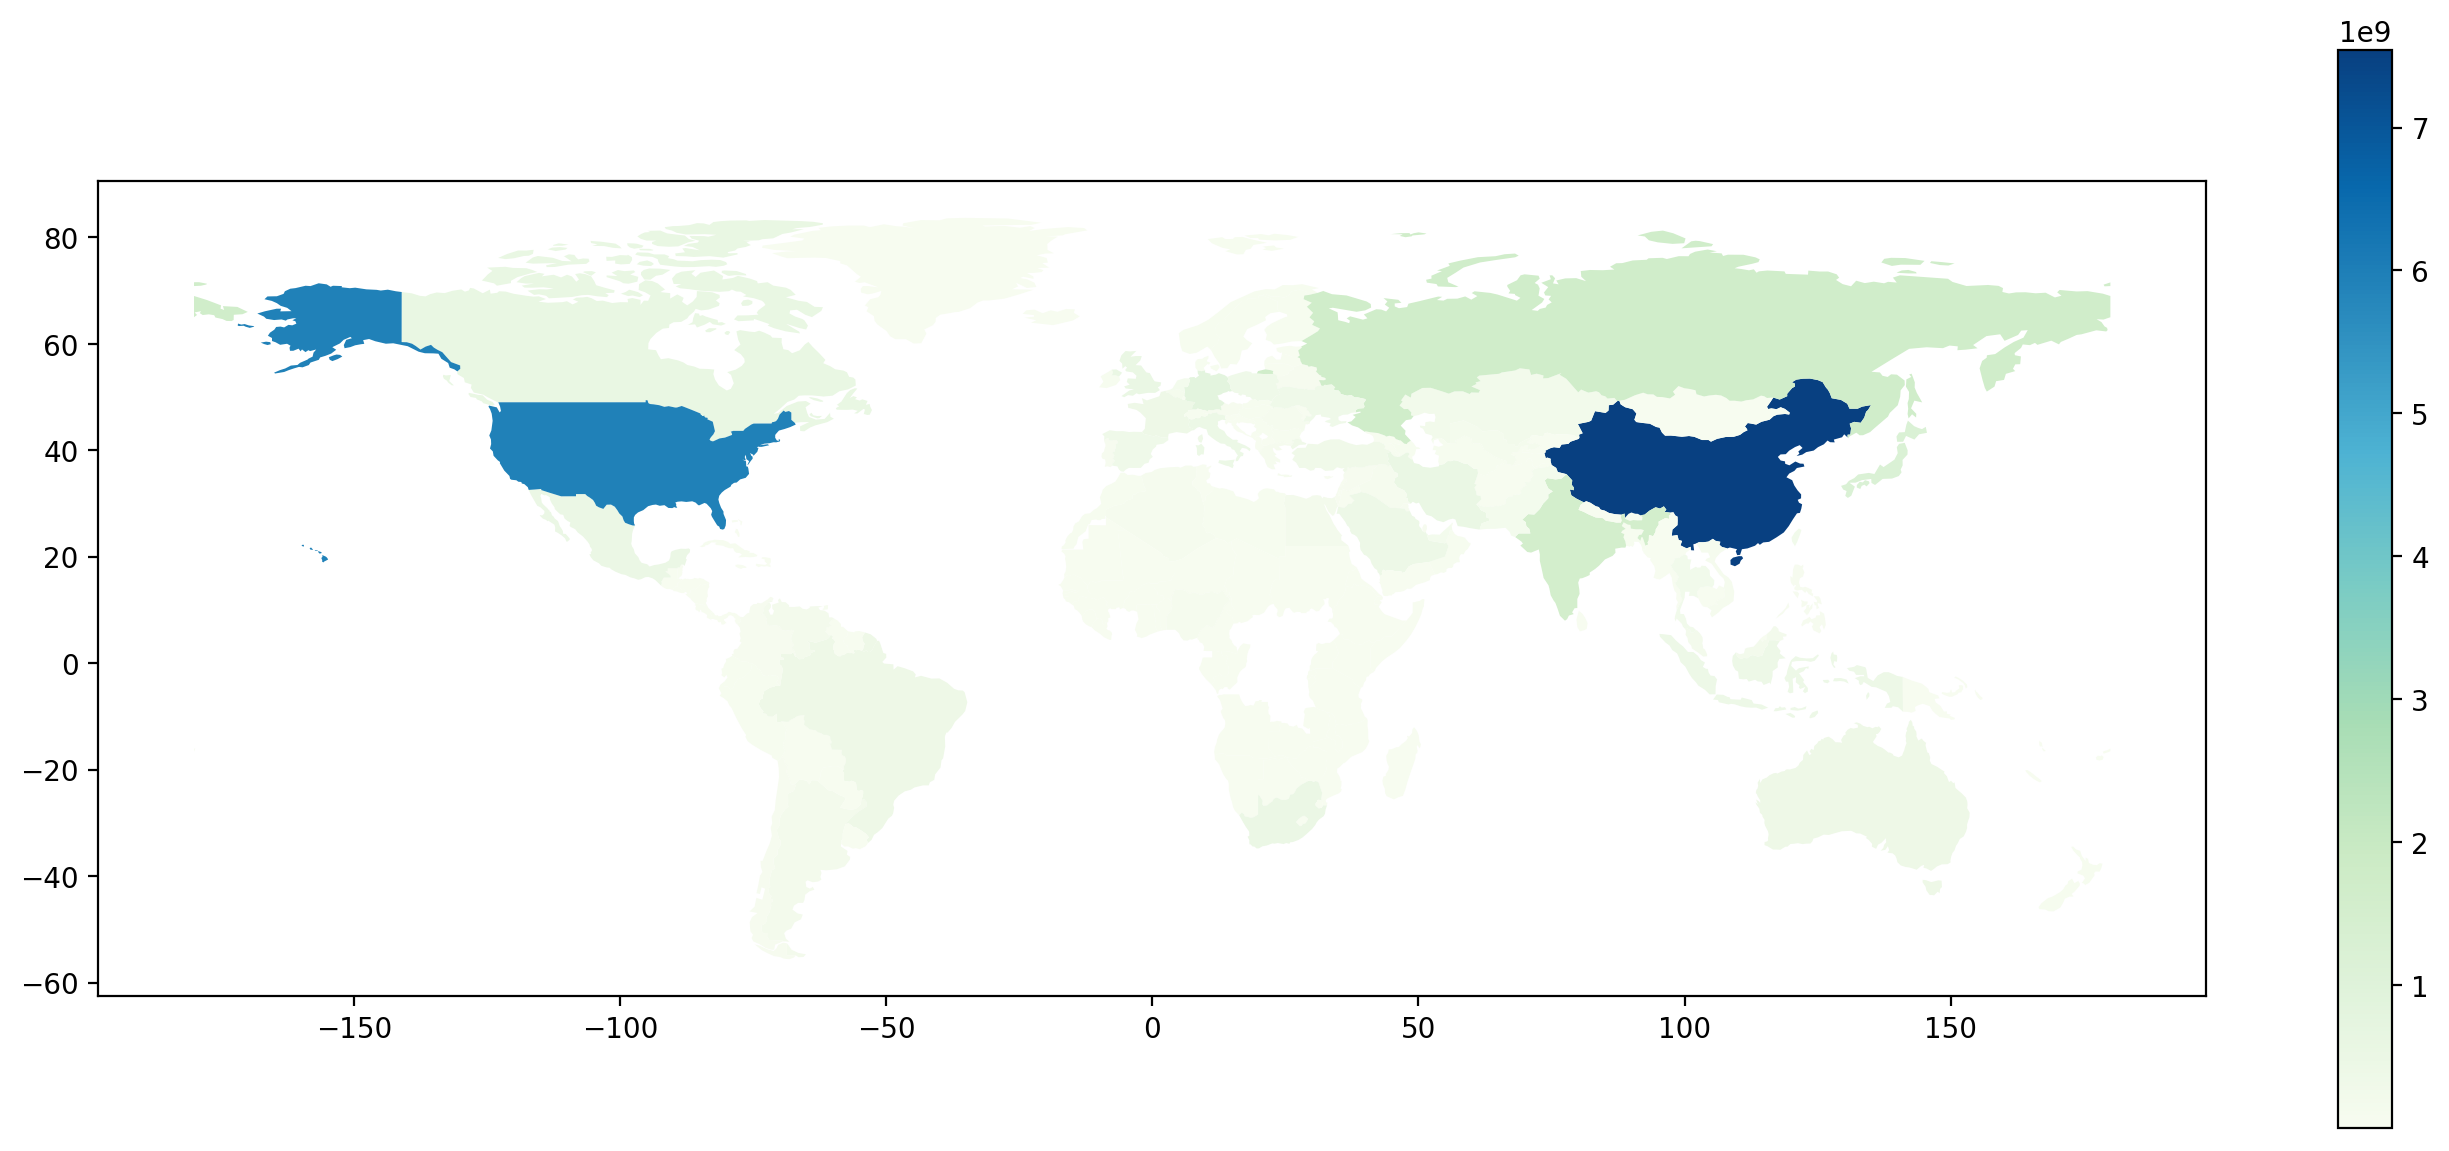

In [75]:
#Print the map
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
df_geo.plot(column='Annual CO₂ emissions(tonnes)', ax=ax, cmap='GnBu', legend=True);

#### Step \#2: Then, we graph the annual greenhouse gas in US from 1990 to 2017

In [76]:
#From dataset8, plot the diagram to show CO2 emission in US from 1800 to 2016
us_annuale = df_country_emission.loc[ 'United States' , : ]

lines = us_annuale.plot.line(x='Year', y='Annual CO₂ emissions(tonnes)', color='red', lw=8, figsize=(100,50))
plt.title('The annual CO₂ emission in US', size = 140)
plt.xlabel('Year', size = 70)
plt.ylabel('CO₂ emissions(tonnes)', size = 70)

Text(0, 0.5, 'CO₂ emissions(tonnes)')

Text(0.5, 1.0, 'Annual Greenhouse Gas in US - 1990 to 2017')

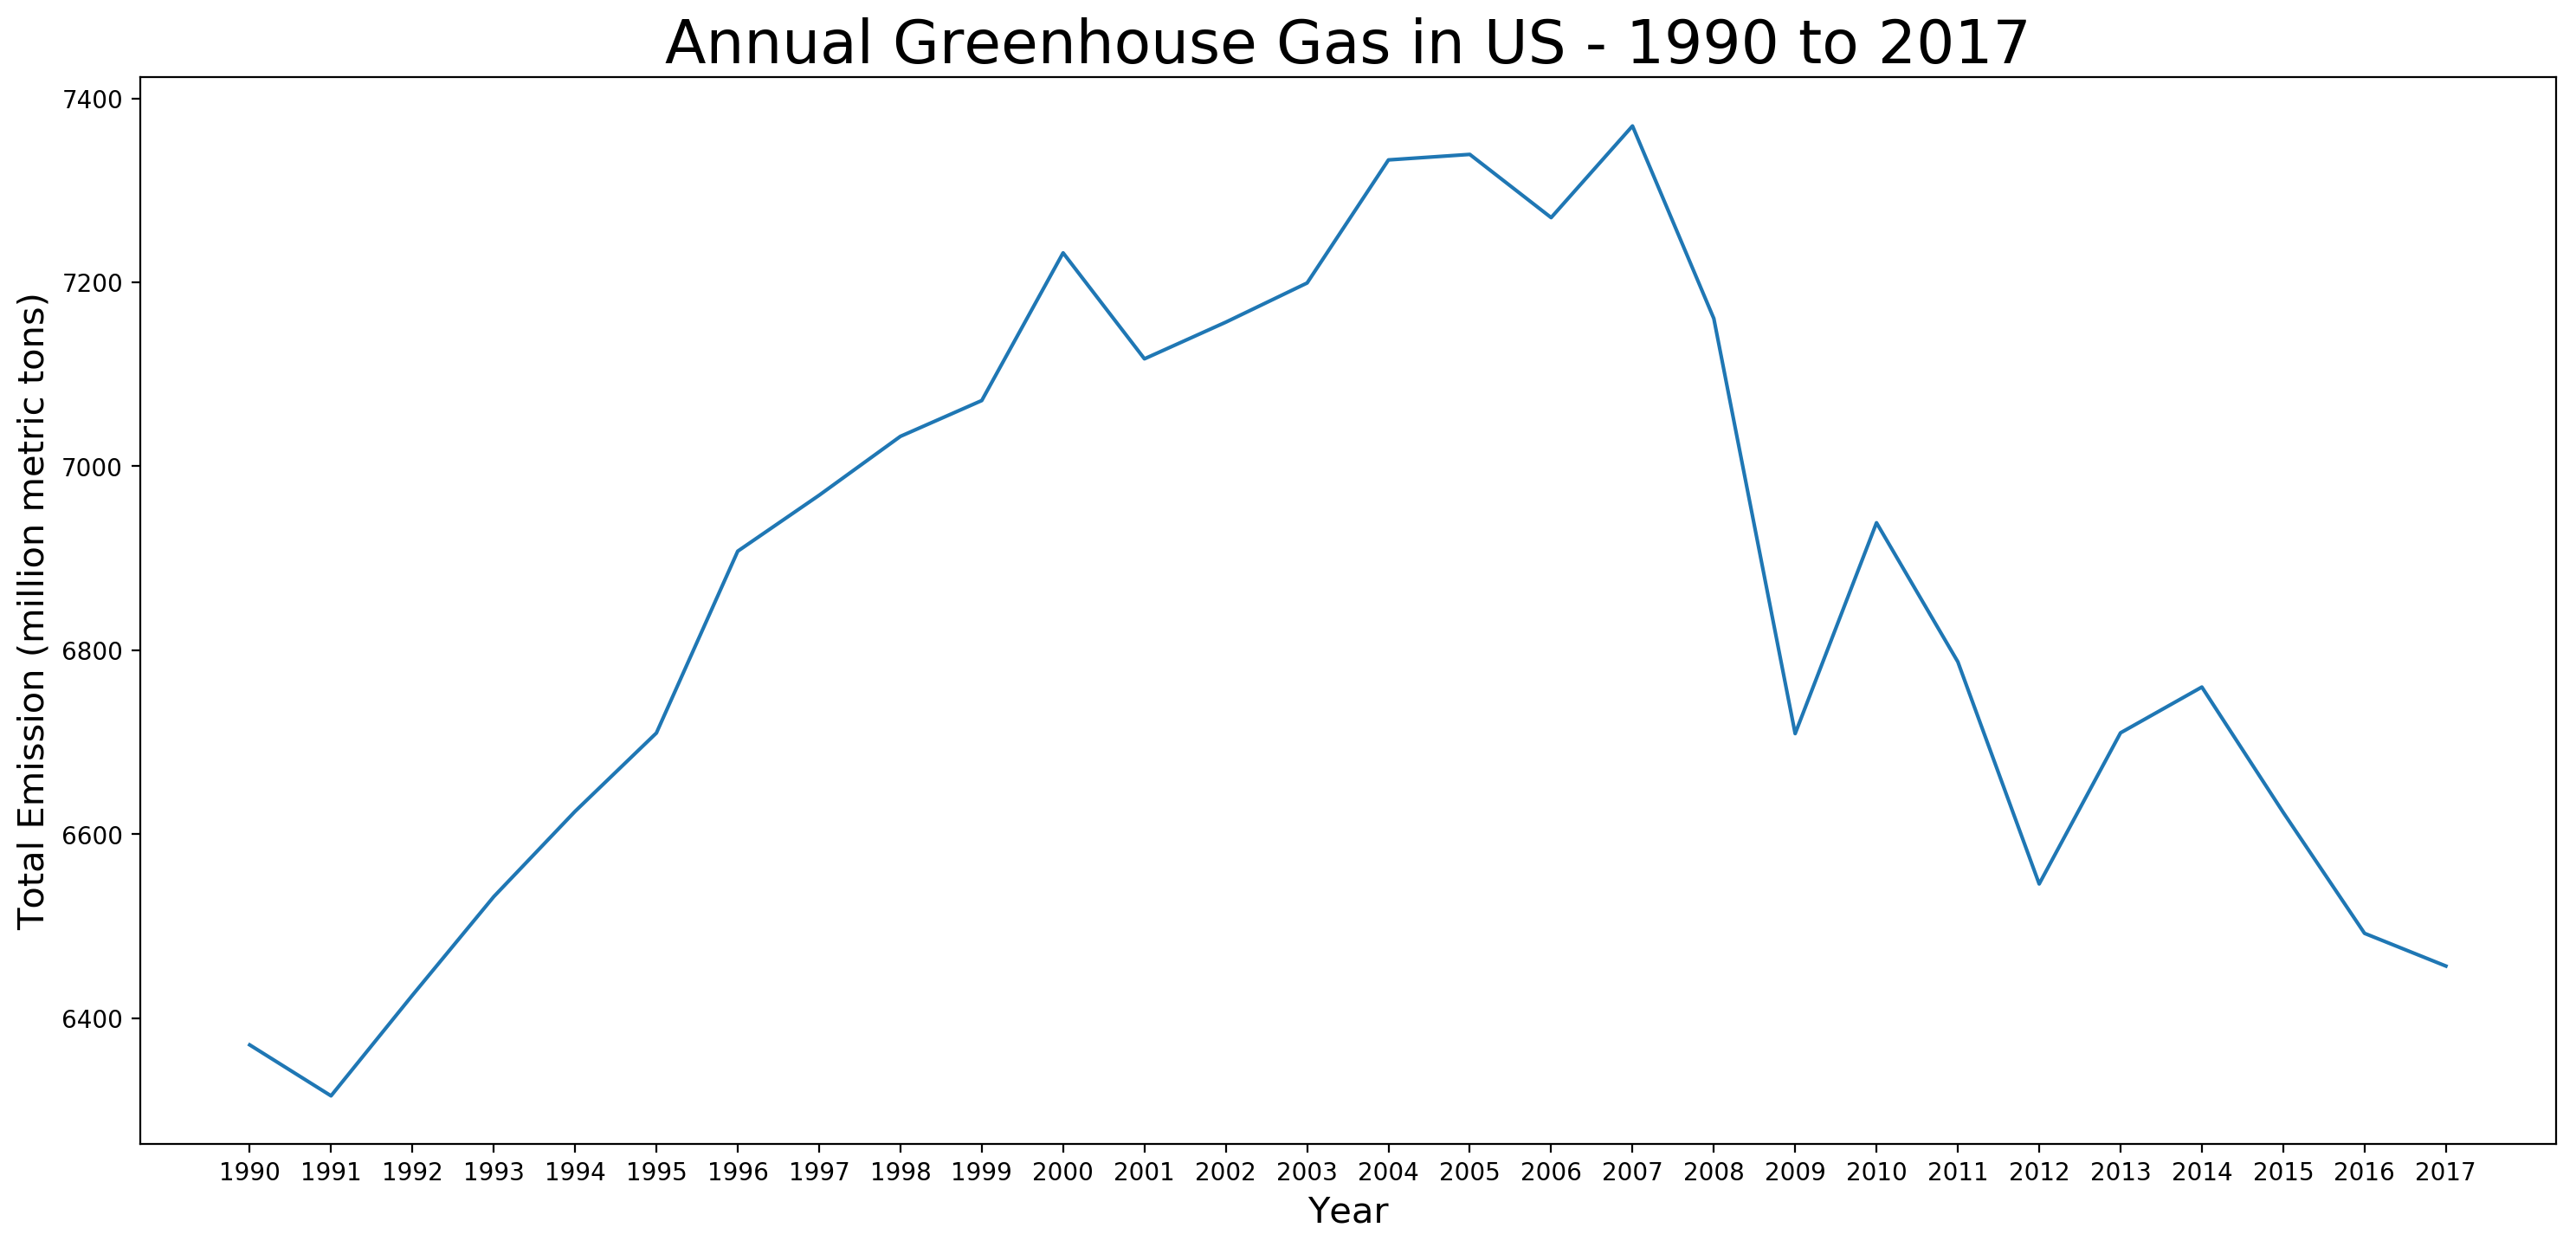

In [77]:
#Plot the diagram to show annual greenhouse gas in US over the recent year 
f = plt.figure(figsize = (18,8))
ax = f.add_subplot(1,1,1)
ax.plot(annual_gas_us['Year'], annual_gas_us['Total'])
ax.set_xlabel('Year', size = 15)
ax.set_ylabel('Total Emission (million metric tons)', size = 15)
ax.set_title('Annual Greenhouse Gas in US - 1990 to 2017', size = 25)

The diagram above shows the changes of annual greenhous gas in US from 1990 to 2017. We can easily notice that the changes are significant. The emission amount increased rapidly started from 1991 until 1999. And there is a peak in 2000 and the emission goes down again and keep constantly increasing until 2007. Starting from 2007, the emission amount got controlled and decreased rapidly within 2 years and keep under controlled.

#### Step \#3: Next, we graph the greenhouse gas by category

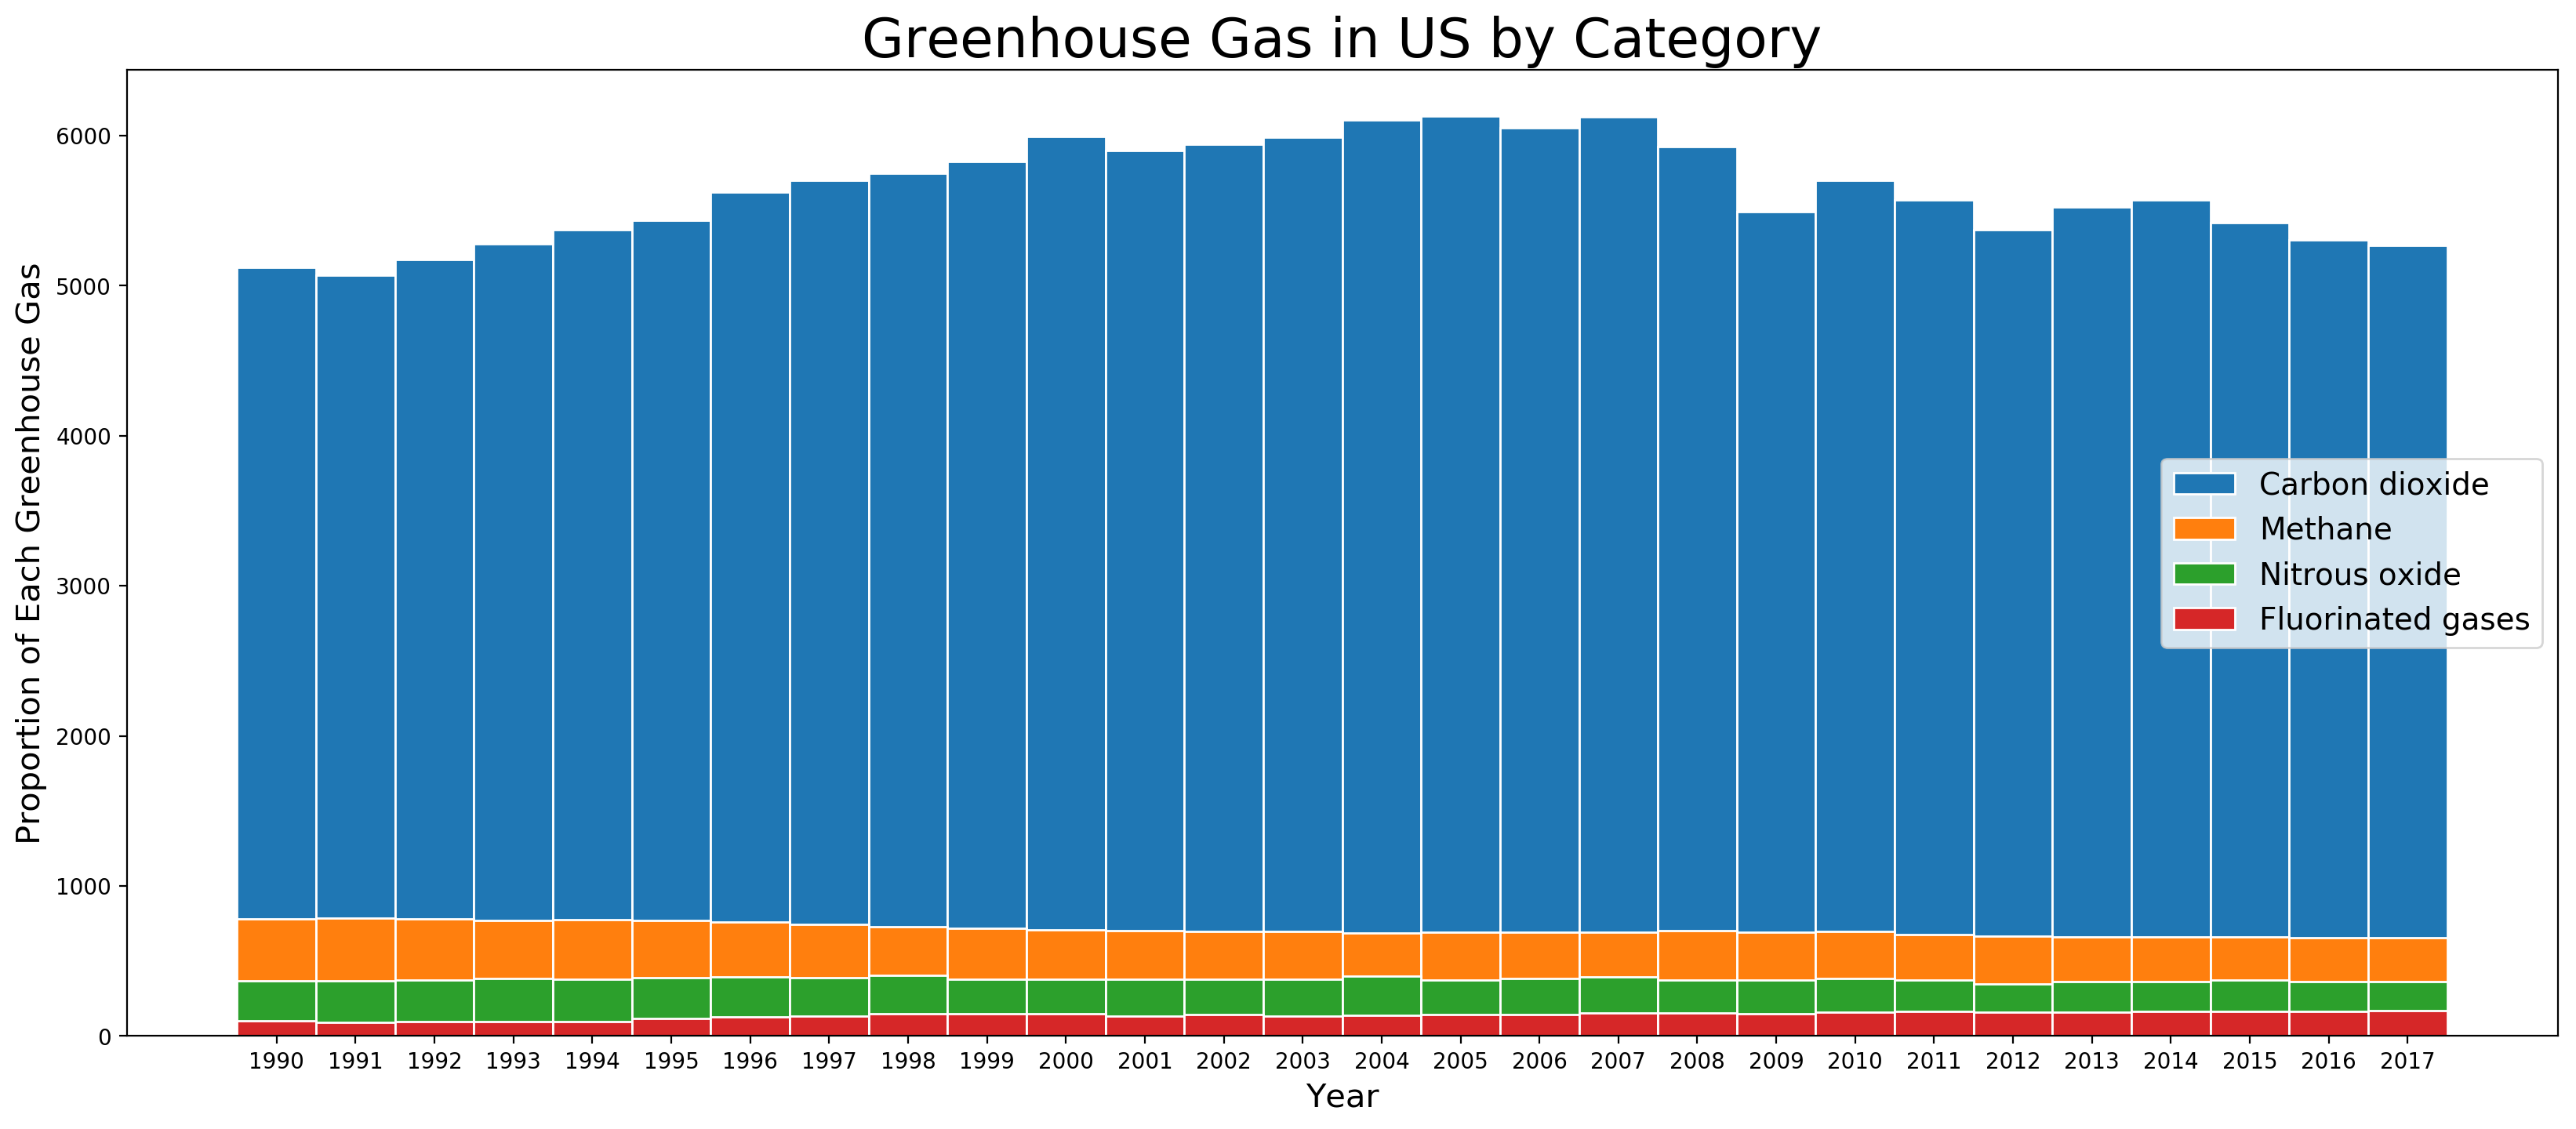

In [78]:
#Generate barplot to show emission in US over year by category
f = plt.figure(figsize = (20,8))
ax = f.add_subplot(1,1,1)
bars = max(annual_gas_us['Total'])
r = annual_gas_us['Year']
barWidth = 1

plt.bar(r, annual_gas_us['Carbon dioxide'], edgecolor = 'white', width = barWidth, label = 'Carbon dioxide')
plt.bar(r, annual_gas_us['Methane'], edgecolor = 'white', width = barWidth, label = 'Methane')
plt.bar(r, annual_gas_us['Nitrous oxide'], edgecolor = 'white', width = barWidth, label = 'Nitrous oxide')
plt.bar(r, annual_gas_us['Fluorinated gases'], edgecolor = 'white', width = barWidth, label = 'Fluorinated gases')

plt.xlabel('Year', size = 15)
plt.ylabel('Proportion of Each Greenhouse Gas', size = 15)
plt.title('Greenhouse Gas in US by Category', size = 25)
plt.legend(loc = 5, prop = {'size': 14})

The barplot shows the proportion of each greenhouse gas from 1990 to 2017. And we can observe that the proportion of carbon dioxide are the highest among these four greenhous gas categories in every year.

### Hypothesis \#1: In this analysis, we're wondering whether the awareness of climate change affects their carbon dioxide emissions. We hypothesize that higher awareness of climate change will have lower carbon dioxide emissions. And vice versa.

we split our discussion of Hypothesis1 into two parts: First, in the level of US, we observe the awareness of climate change of US people from different states and compare it with carbon emission data. Second, we observe the CO2 emission in different countries all around the world, and then compare it with the global awareness of climate change.

##### 1. states level

In [79]:
#sort the dataset in descending order
sort_state_2014 = df_YPCCC_2014_State_new.sort_values(by = ['happening'], ascending = False)

Text(0.5, 1.0, 'Awareness of Climate Change in US - 2014')

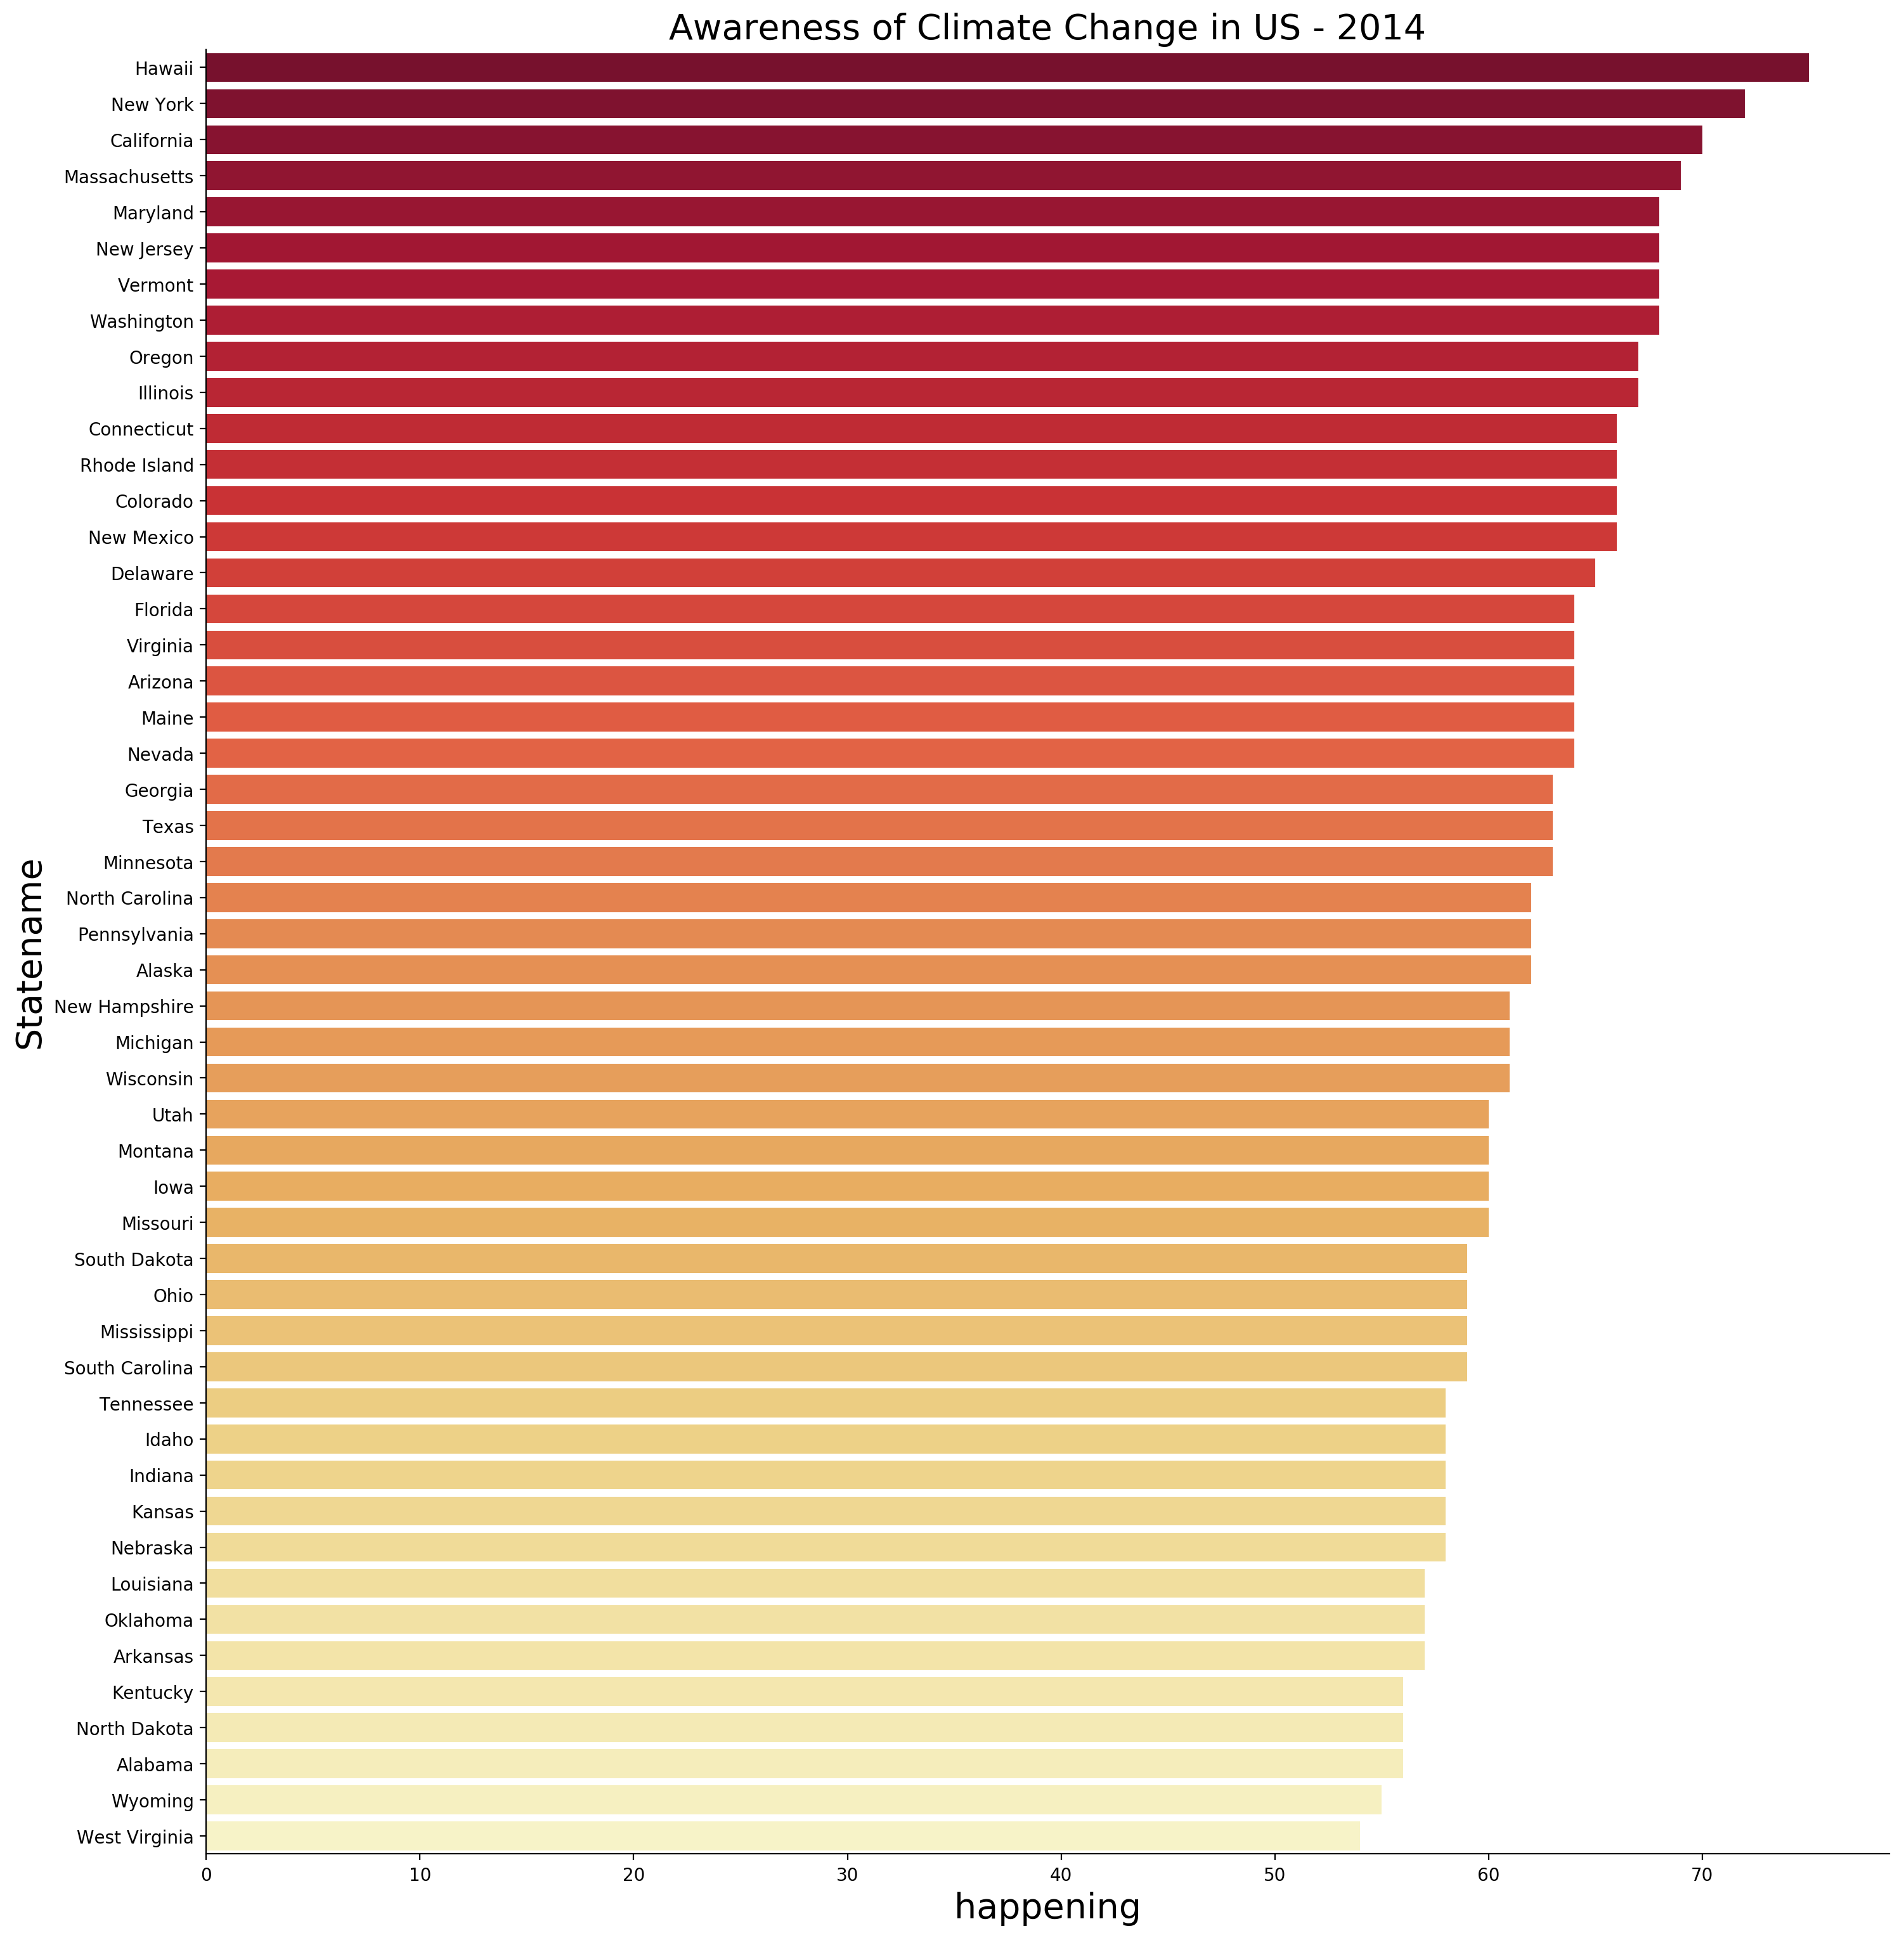

In [80]:
#plot awareness states
sc = sns.color_palette("YlOrRd", 51)
sc.reverse()
sns.catplot(x = 'happening', y = 'Statename', kind = 'bar', palette = sc, data = sort_state_2014, height = 15)
plt.xlabel('happening', size = 20)
plt.ylabel('Statename', size = 20)
plt.title('Awareness of Climate Change in US - 2014', size = 20)

We can observe that the highest awareness of climate change state is Hawaii, and the lowest awareness of climate change state is West Virginia. Next, we will extract top 10 and least 10 states.

In [81]:
#store top 10 awareness states
top10_aware_2014 = sort_state_2014.head(10)

#store least 10 awareness states
least10_aware_2014 = sort_state_2014.tail(10)

#### Next, we need both the same top10 and least10 awareness states in 2014 from the dataset 2016 in order to compare

In [82]:
#extract top10 awareness states in 2014 from the dataset 2016
df_sametopstate_2016 = pd.DataFrame([])
for index, rows in df_YCOM_2016_state.iterrows():
    name = rows['GeoName']
    happen = rows['happening']
    for n in top10_aware_2014['Statename']:
        if name == n:
            df_sametopstate_2016 = df_sametopstate_2016.append({'Statename' : name, 'happening' : happen}, ignore_index = True)
            
#df_sametopstate_2016

In [83]:
#extract least10 awareness states in 2014 from the dataset 2016
df_sameleaststate_2016 = pd.DataFrame([])
for index, rows in df_YCOM_2016_state.iterrows():
    name = rows['GeoName']
    happen = rows['happening']
    for n in least10_aware_2014['Statename']:
        if name == n:
            df_sameleaststate_2016 = df_sameleaststate_2016.append({'Statename' : name, 'happening' : happen}, ignore_index = True)
            
#df_sameleaststate_2016

#### Now, we are going to extract states's emission amount(both top10 and least10) in both 2014 and 2016 in order to compare the changes to see whether there is any correlation.

In [84]:
#extract the top10 awareness state's correlated emission amount in 2014 and 2016
df_emissiontop10state = pd.DataFrame([])
for i, j in df_CO2_state_keep.iterrows():
    name = j['State']
    emission1 = j['2014']
    emission2 = j['2016']
    for n in top10_aware_2014['Statename']:
        if name == n:
            df_emissiontop10state = df_emissiontop10state.append({'Statename' : name, 'CO2_2014' : emission1,
                                                             'CO2_2016' : emission2}, ignore_index = True)
            
df_emissiontop10state = df_emissiontop10state[['Statename', 'CO2_2014', 'CO2_2016']]

#merge awareness based on statename
df_topstate = pd.merge(top10_aware_2014, df_sametopstate_2016, on = 'Statename')
df_topstate = pd.merge(df_topstate, df_emissiontop10state, on = 'Statename')
df_topstate = df_topstate[['Statename', 'happening_x', 'happening_y', 'CO2_2014', 'CO2_2016']]
df_topstate = df_topstate.rename(index = str, columns = {"happening_x": "Awareness2014", "happening_y": "Awareness2016"})
df_topstate

Statename  Awareness2014  Awareness2016    CO2_2014    CO2_2016
0         Hawaii             75         78.490   19.179281   18.598966
1       New York             72         77.018  162.857535  171.968046
2     California             70         75.241  358.604029  357.499077
3  Massachusetts             69         73.947   62.689415   64.589904
4       Maryland             68         75.139   60.788144   62.184186
5     New Jersey             68         75.110  105.200721  114.727829
6        Vermont             68         72.692    5.550093    5.978197
7     Washington             68         72.632   69.350357   72.460264
8         Oregon             67         72.137   37.493296   38.527135
9       Illinois             67         72.649  219.375145  235.412072

##### 2. countries level

In [99]:
sort_df_country_emission_2008 = df_country_emission_2008.sort_values(by = ['Annual CO₂ emissions(tonnes)'], ascending = False)
ax = sort_df_country_emission_2008.plot.bar(rot=0, figsize=(100,50))
sort_df_country_emission_2008 = sort_df_country_emission_2008.drop(['World'])
plt.title('Global CO2 Emmission Level in 2008', size = 100)
plt.xlabel('Countries', size = 80)
plt.ylabel('The Amount of Emission', size = 80)

Text(0, 0.5, 'The Amount of Emission')

Text(0.5, 0, 'Countries')

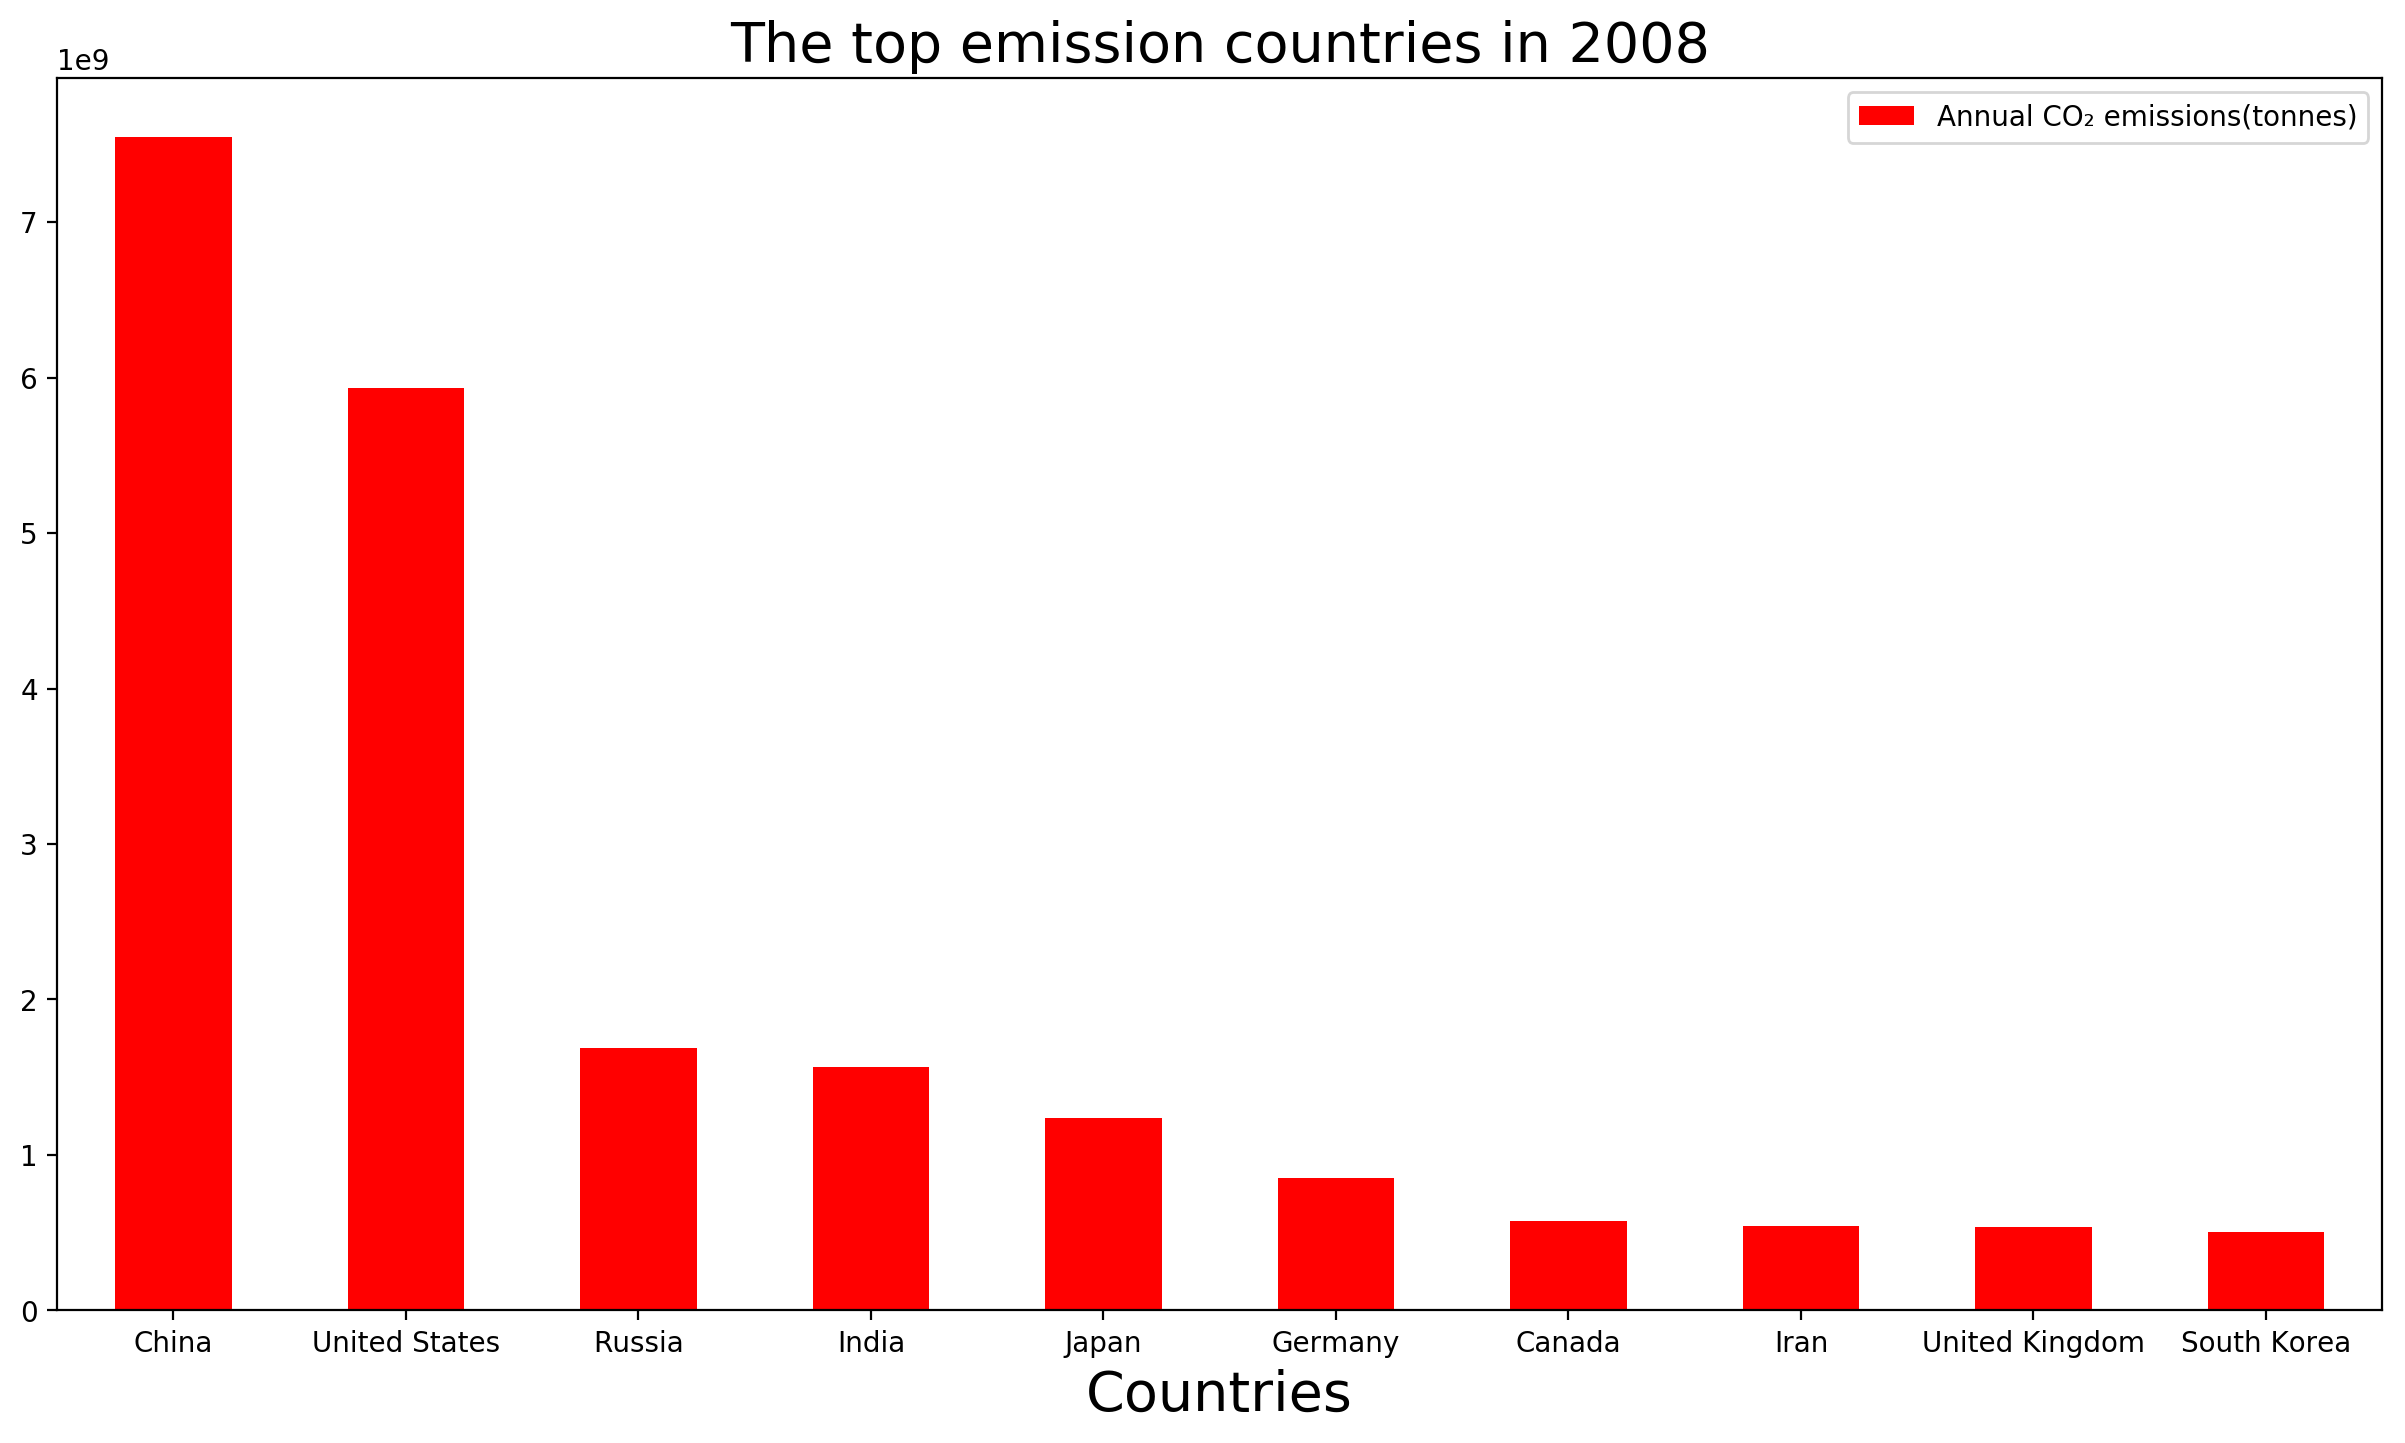

In [100]:
country_most_df_2008 = sort_df_country_emission_2008.head(10)
bx = country_most_df_2008.plot.bar(rot=0, figsize = (15,8), color = 'red')
plt.title('The top emission countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

Text(0.5, 0, 'Countries')

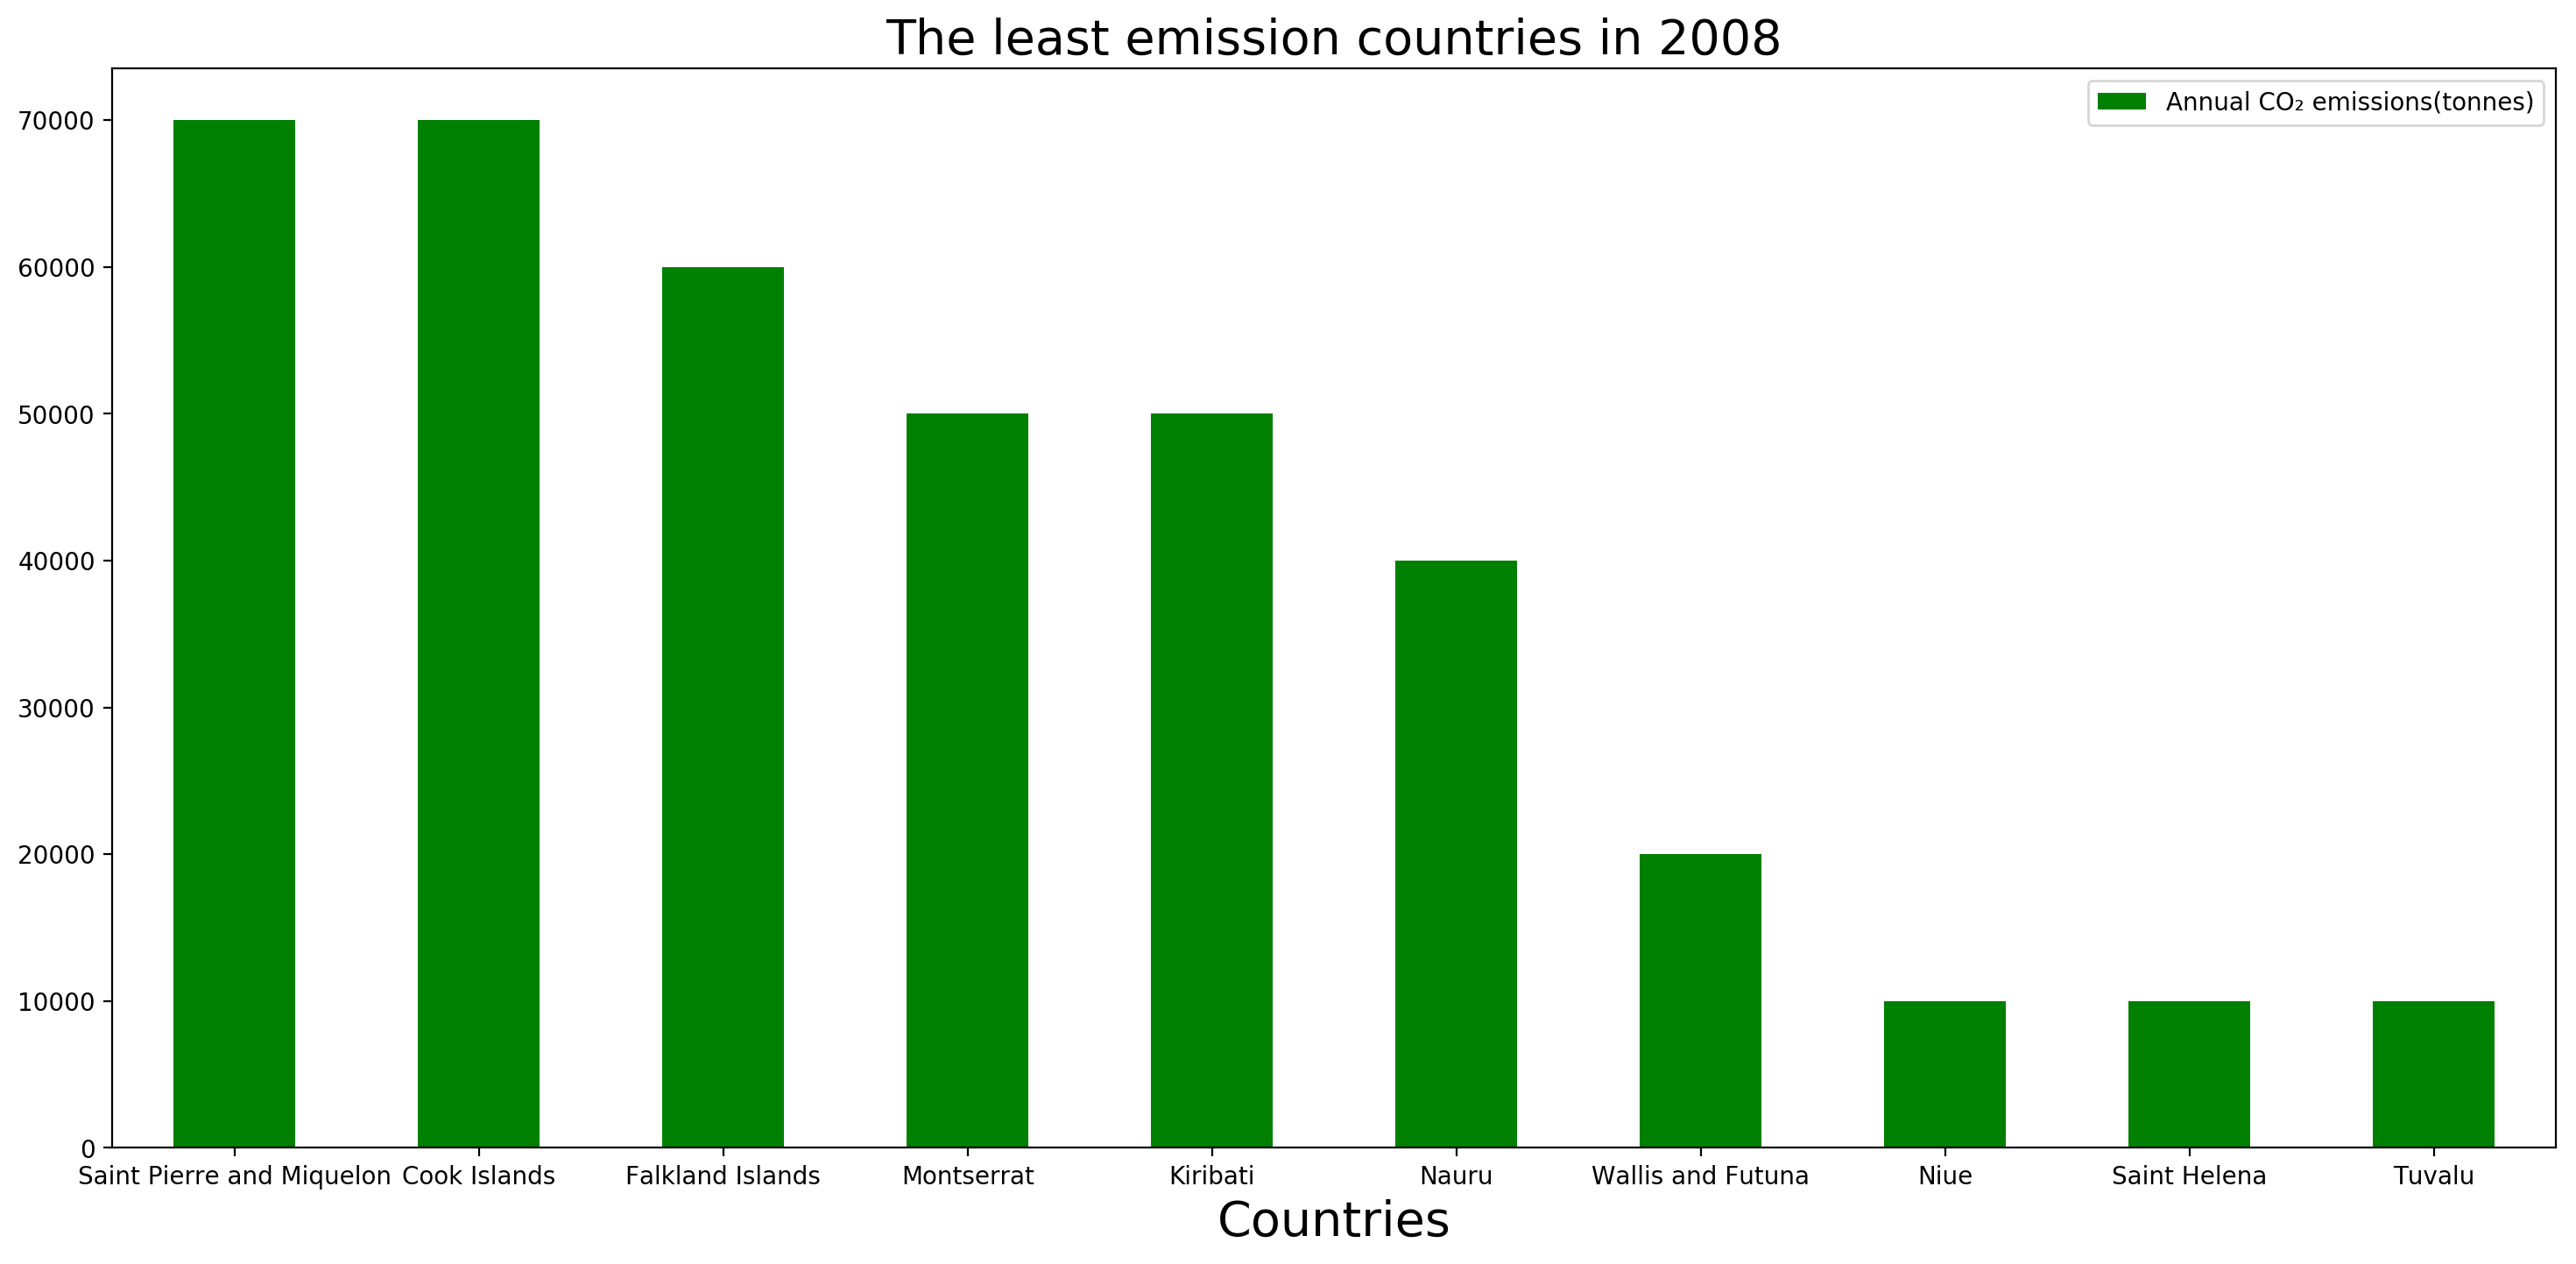

In [87]:
country_least_df_2008 = sort_df_country_emission_2008.tail(10)
cx = country_least_df_2008.plot.bar(rot=0, figsize=(18,8), color = 'green')
plt.title('The least emission countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

However, the 10 most and least CO2 emission by country level is not a fair rank and could not precisely quantify a countries responsibility for the climate change worldwide. By these statistics, it is clear that the top-ranked countries, like China, must contribute more on global warming than low-ranked countries, like Tuvalu, did in year 2008. But the population, the level of industrialization, and other confounds is worthy considering.

Thus, we read another data set which includes population and other confounds to analysis a country's CO2 emission level. Meanly, we compare different countries emission level by emission amount in a year per capita.

In [88]:
df_country = pd.read_excel('Datasets/awareness_by_percentage.xlsx',header=1)

In [89]:
#df_country = pd.read_excel('Datasets/awareness_by_percentage.xlsx',header=1)

#Extract the population
df_country_population = df_country.filter(items=['Country', 'Population.2008'])
df_country_population = df_country_population.rename(index=str, columns={"Country": "Entity", "Population.2008": "Population.2008"})
df_country_population.set_index('Entity', inplace=True)

#Merge it with the emission data and calculate the per 
sort_df_country_emission_2008 = sort_df_country_emission_2008.merge(df_country_population, on = 'Entity', validate = 'one_to_one')
sort_df_country_emission_2008['Emission/capita'] = sort_df_country_emission_2008['Annual CO₂ emissions(tonnes)'].div(sort_df_country_emission_2008['Population.2008'].values,axis=0)
sort_df_country_emission_2008

Annual CO₂ emissions(tonnes)  Population.2008  Emission/capita
Entity                                                                       
China                          7.546890e+09     1.076805e+09         7.008594
United States                  5.932980e+09     2.430274e+08        24.412801
Russia                         1.685270e+09     1.210846e+08        13.918116
India                          1.567100e+09     8.108412e+08         1.932684
Japan                          1.237290e+09     1.104990e+08        11.197295
...                                     ...              ...              ...
Rwanda                         5.400000e+05     5.651066e+06         0.095557
Chad                           5.100000e+05     5.617401e+06         0.090789
Djibouti                       5.000000e+05     5.258570e+05         0.950829
Belize                         4.400000e+05     1.864950e+05         2.359313
Burundi                        1.900000e+05     4.816158e+06         0.039451

[117 rows x 3 columns]

we also merge the awareness data in the data set for later comparison

In [92]:
# Extract the awareness data
df_country_aware = df_country.filter(items=['Country', 'Aware'])
df_country_aware = df_country_aware.rename(index=str, columns={"Country": "Entity", "Population.2008": "Population.2008"})
df_country_aware.set_index('Entity', inplace=True)

# Merge it
country_emission_awareness_2008 = sort_df_country_emission_2008.merge(df_country_aware, on = 'Entity', validate = 'one_to_one')
sort_country_emission_awareness_2008 = country_emission_awareness_2008.sort_values(by = ['Emission/capita'], ascending = False)
sort_country_emission_awareness_2008 = sort_country_emission_awareness_2008.drop(columns = ['Annual CO₂ emissions(tonnes)','Population.2008'])

Text(0.5, 0, 'Countries')

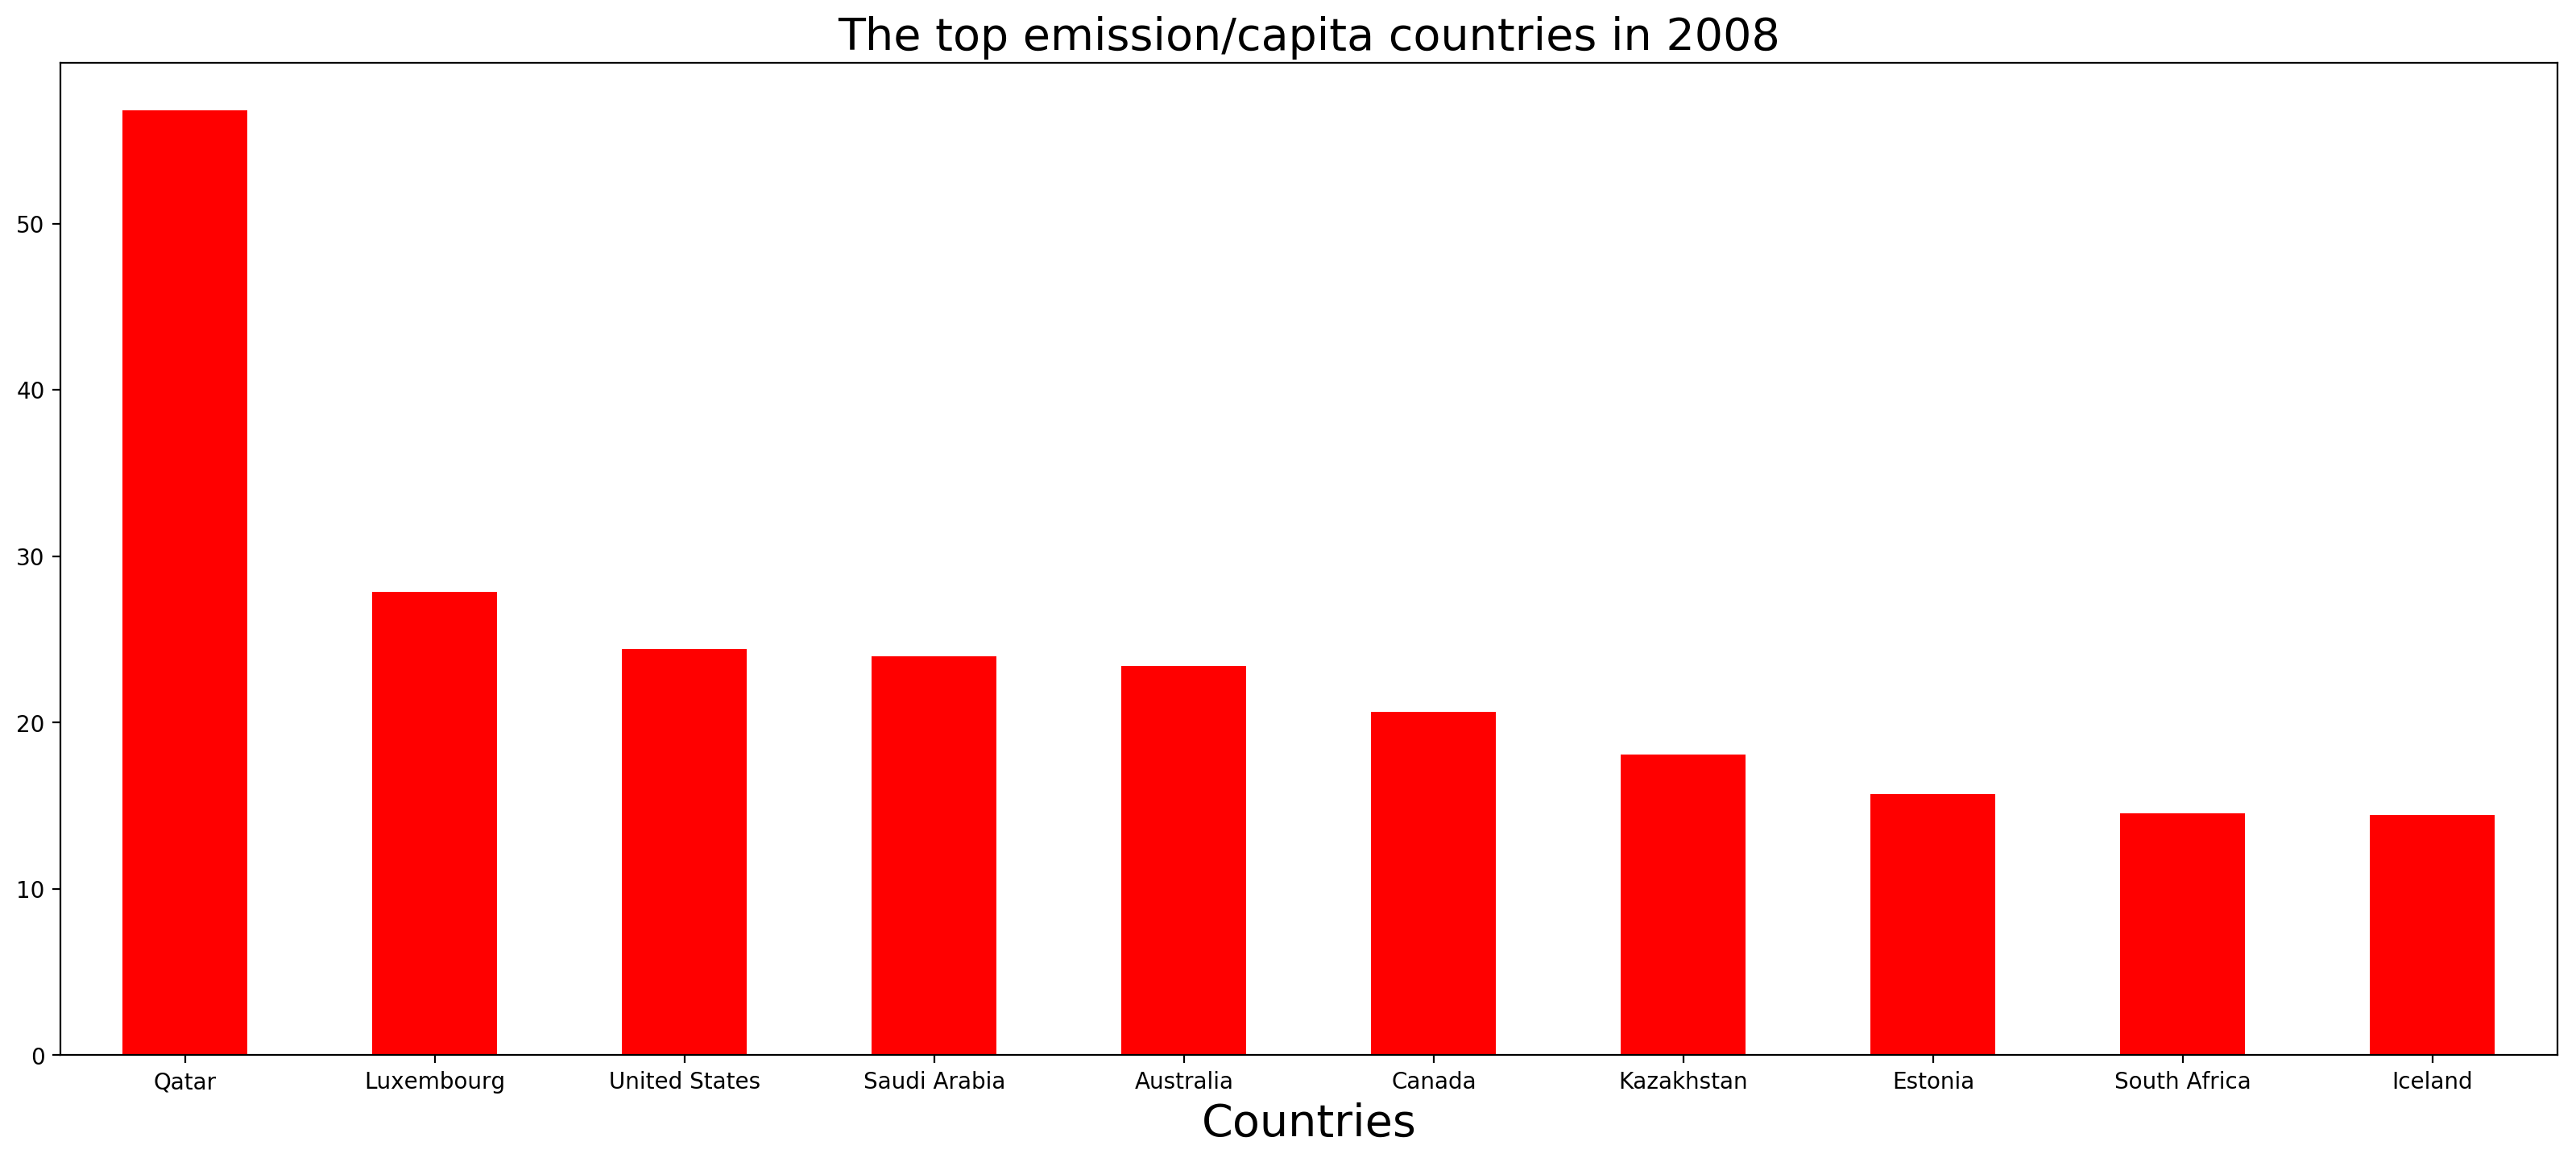

In [93]:
#plot the most emission countries
df_most_cemission = sort_country_emission_awareness_2008['Emission/capita'].head(10)
dx = df_most_cemission.plot.bar(rot=0, figsize=(20,8), color = 'red')
plt.title('The top emission/capita countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

Text(0.5, 0, 'Countries')

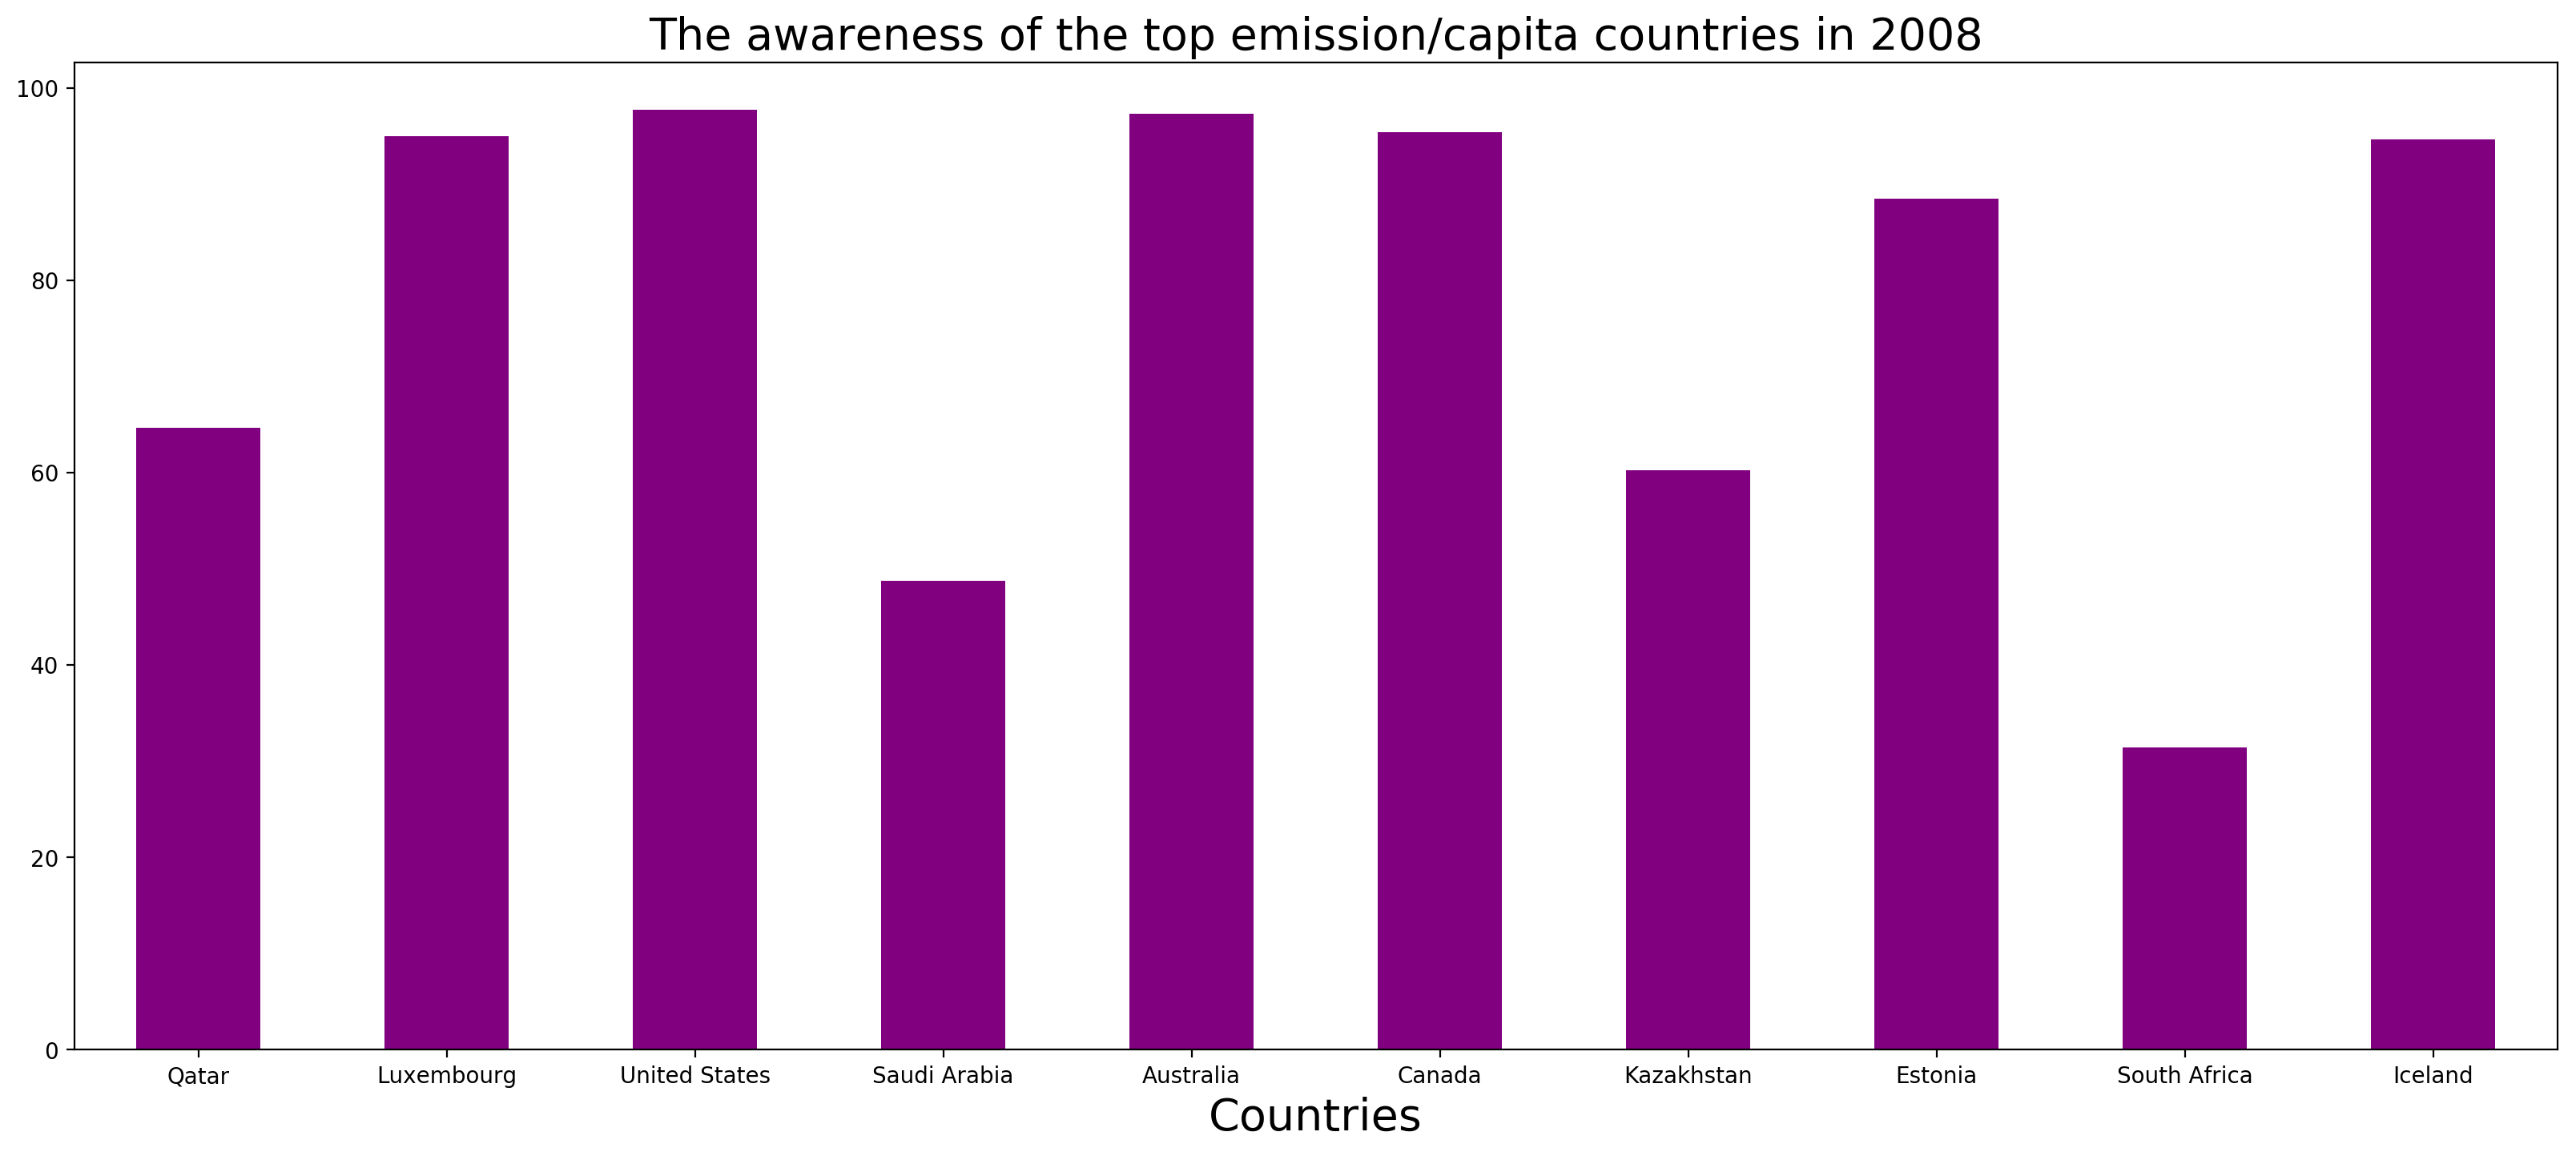

In [94]:
#plot the corresponding awareness data
df_most_cemission_awareness = sort_country_emission_awareness_2008['Aware'].head(10)
ex = df_most_cemission_awareness.plot.bar(rot=0, figsize=(20,8), color = 'purple')
plt.title('The awareness of the top emission/capita countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

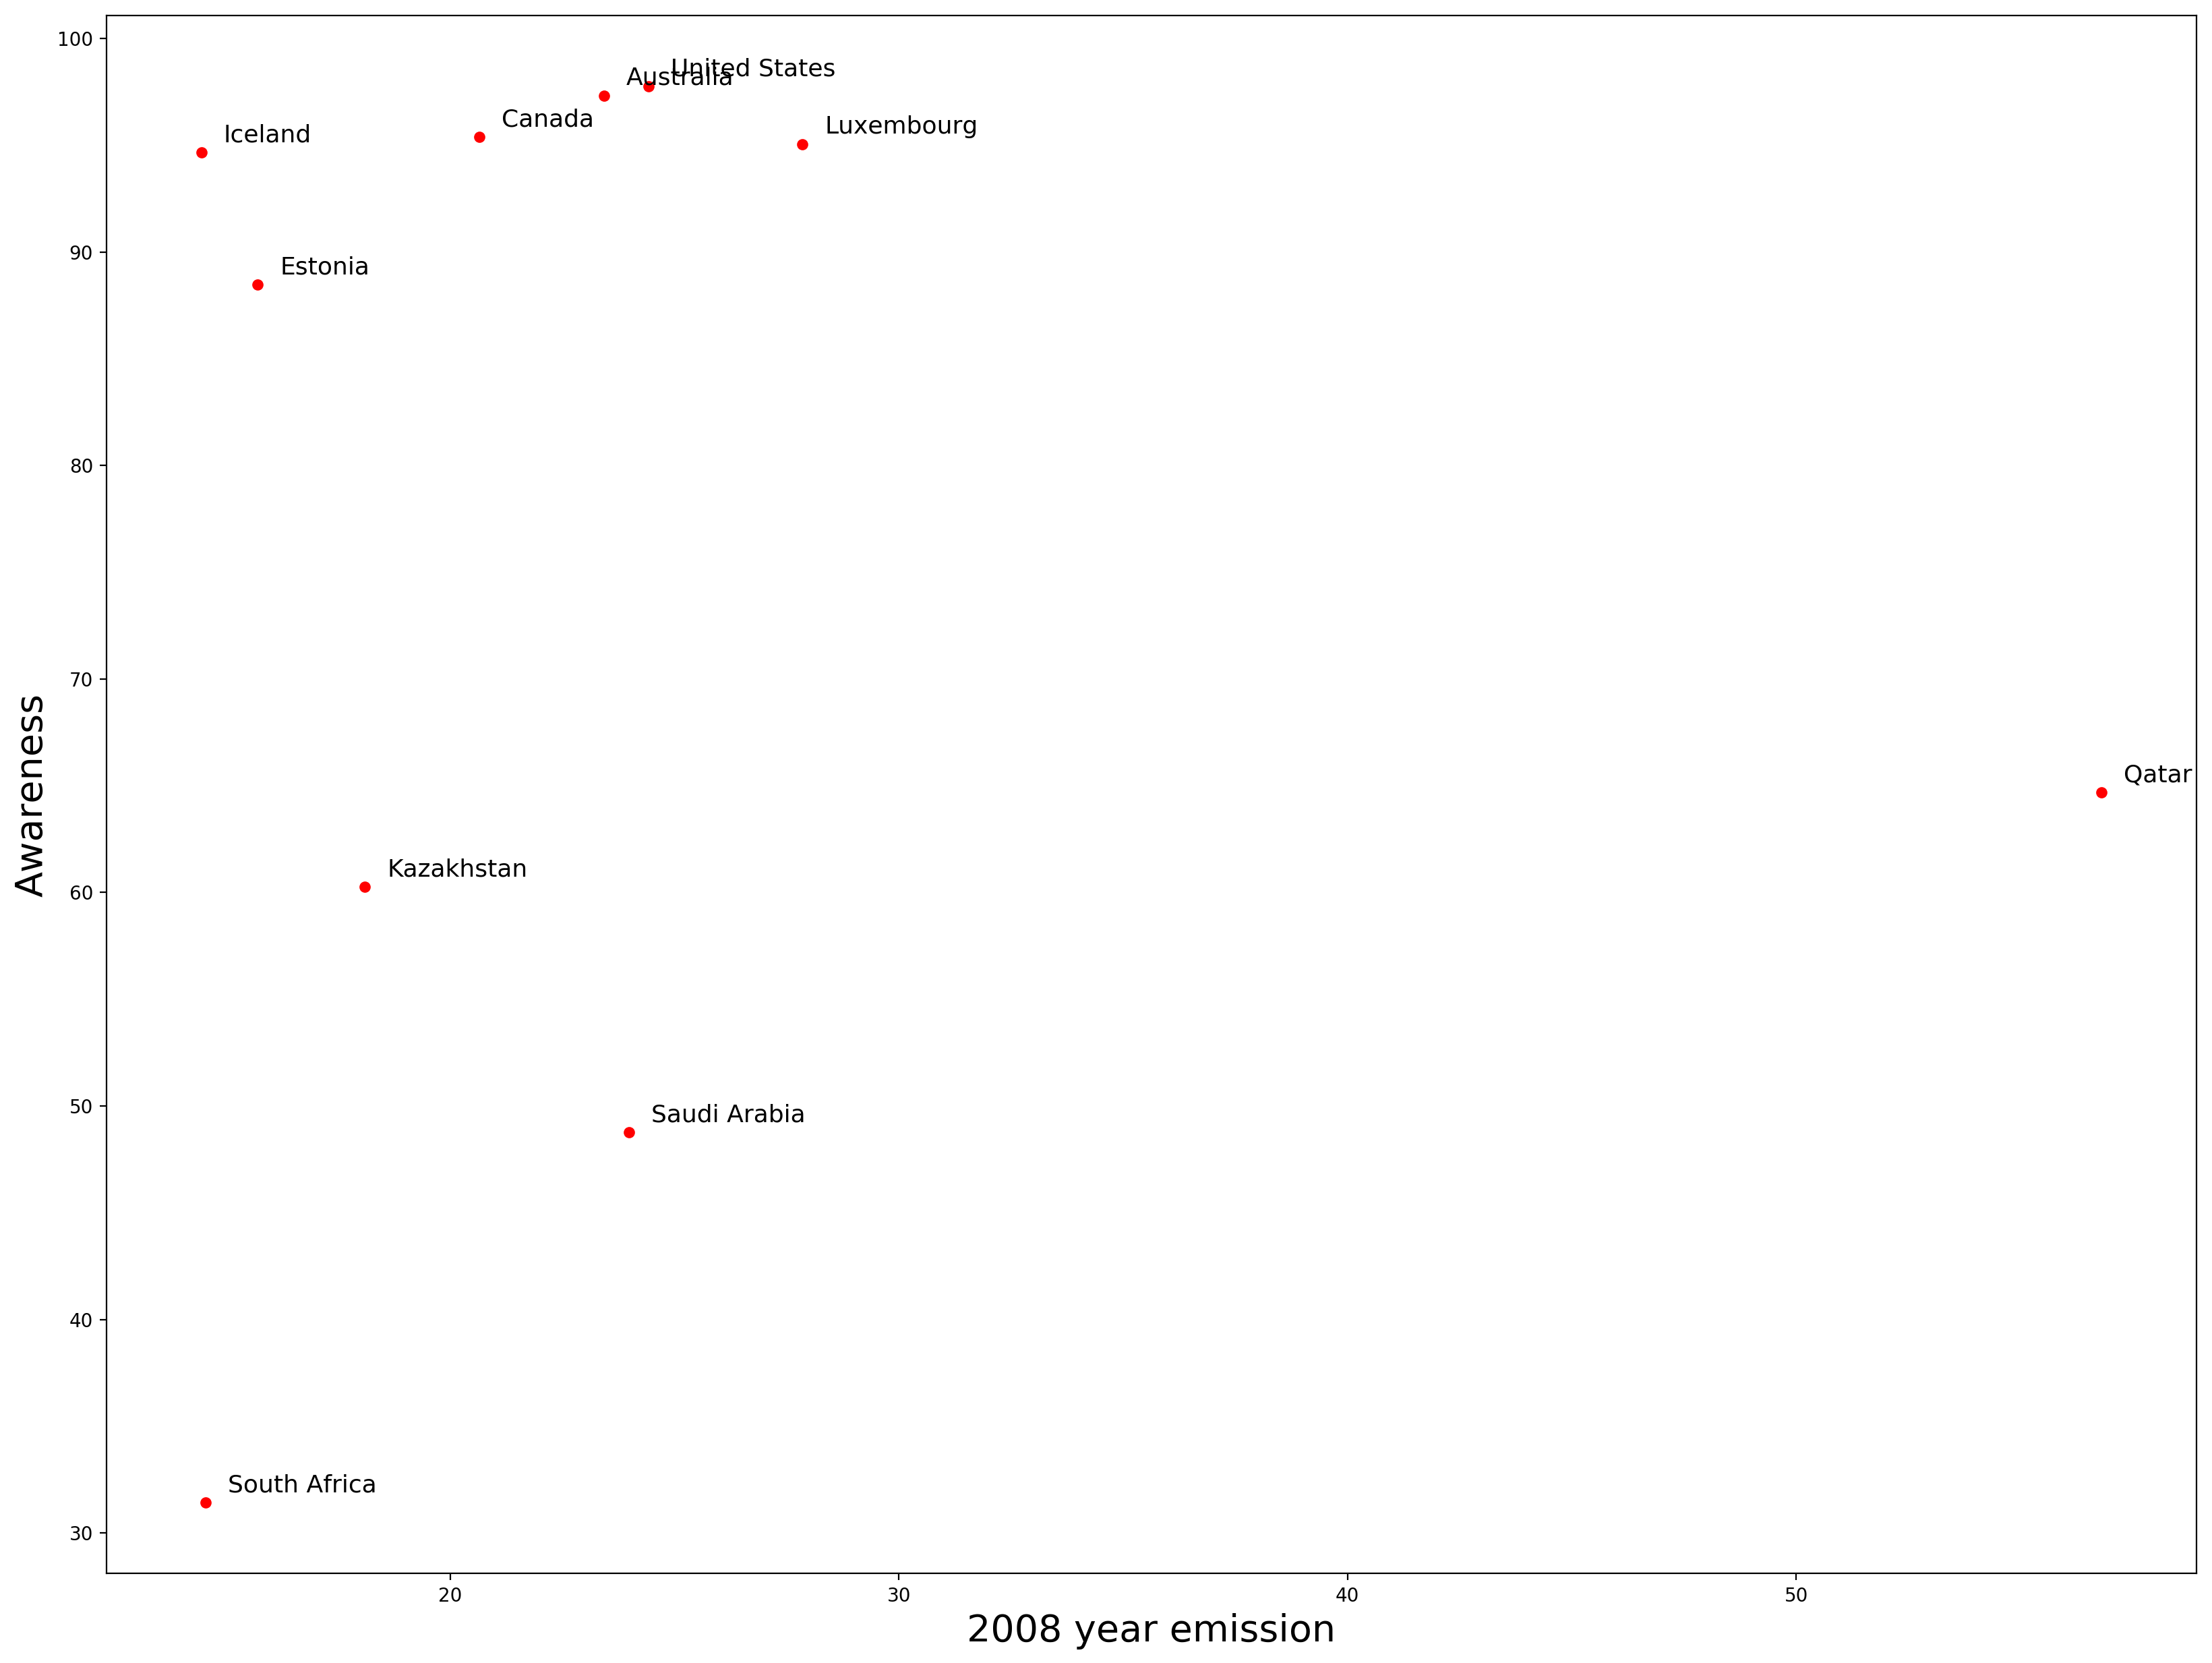

In [95]:
#Plot the scatter plot for these data
most_emission_awareness = sort_country_emission_awareness_2008.head(10)
most_emission_awareness = most_emission_awareness.reset_index()

x = most_emission_awareness['Emission/capita']
y = most_emission_awareness['Aware']
types = most_emission_awareness['Entity']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'red', markersize = 10)
    plt.text(x_coor + 0.5, y_coor + 0.5, j, fontsize = 13)
    plt.xlabel('2008 year emission', fontsize = 20)
    plt.ylabel('Awareness', fontsize = 20)
    
plt.gcf().set_size_inches((20, 15))
plt.show()

Text(0.5, 0, 'Countries')

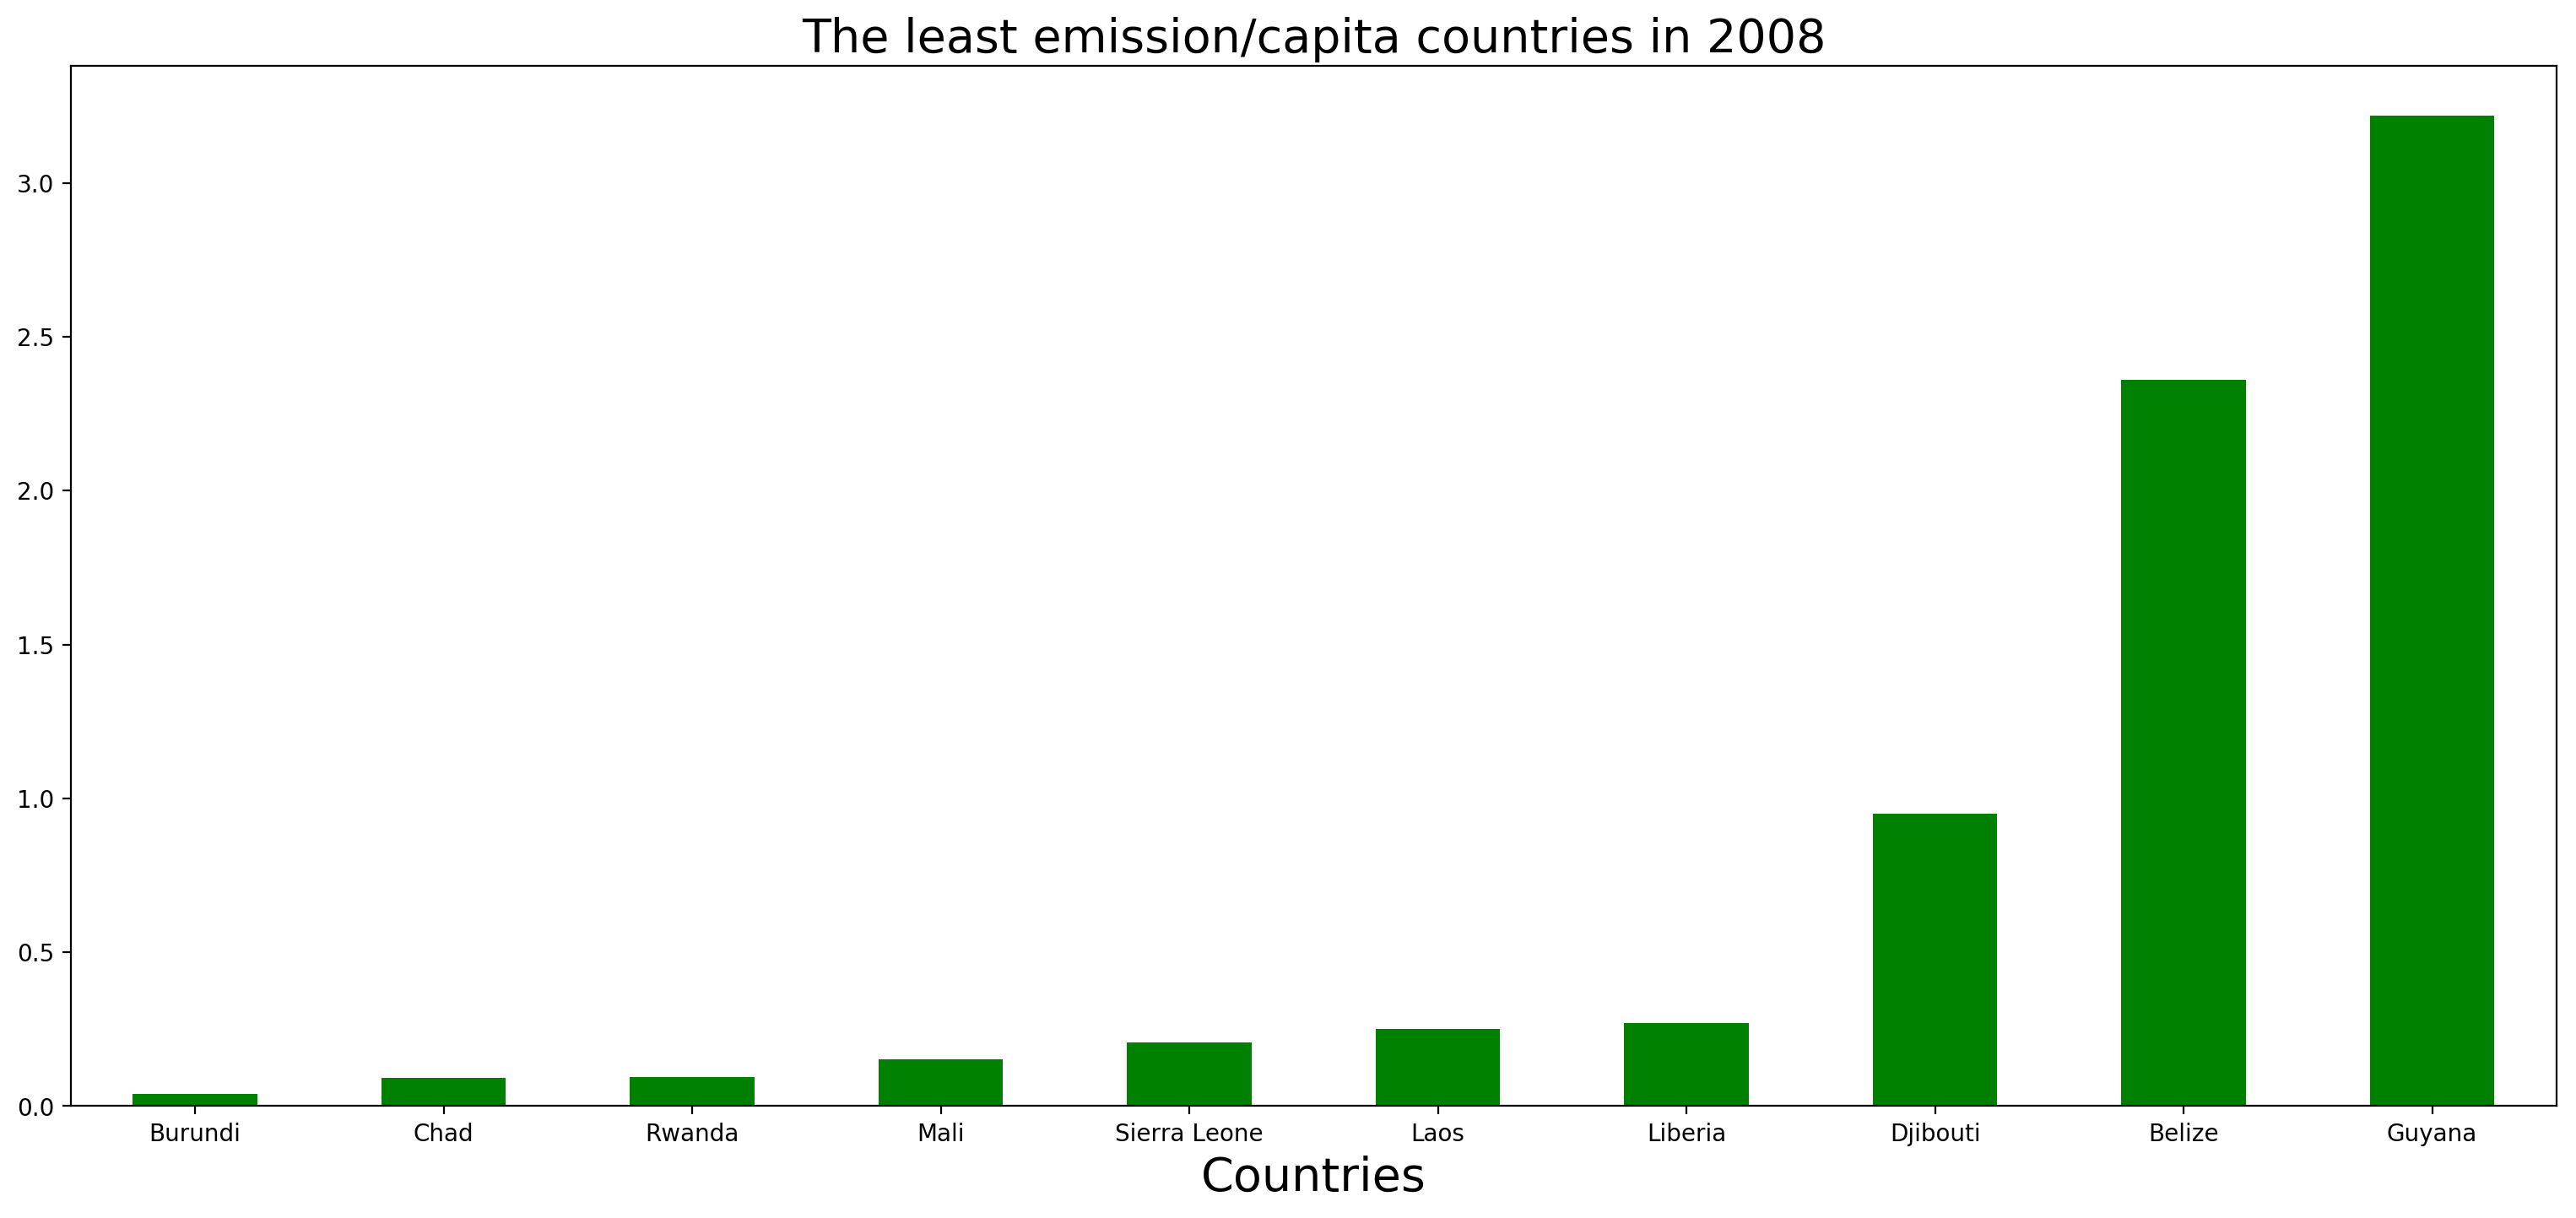

In [96]:
least_emission_awareness = country_emission_awareness_2008.tail(10).drop(columns = ['Annual CO₂ emissions(tonnes)','Population.2008'])
least_emission_awareness = least_emission_awareness.sort_values(by = ['Emission/capita'], ascending = True)
df_least_cemission = least_emission_awareness['Emission/capita'].tail(10)

ex = df_least_cemission.plot.bar(rot=0, figsize = (19,8), color = 'green')
plt.title('The least emission/capita countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

Text(0.5, 0, 'Countries')

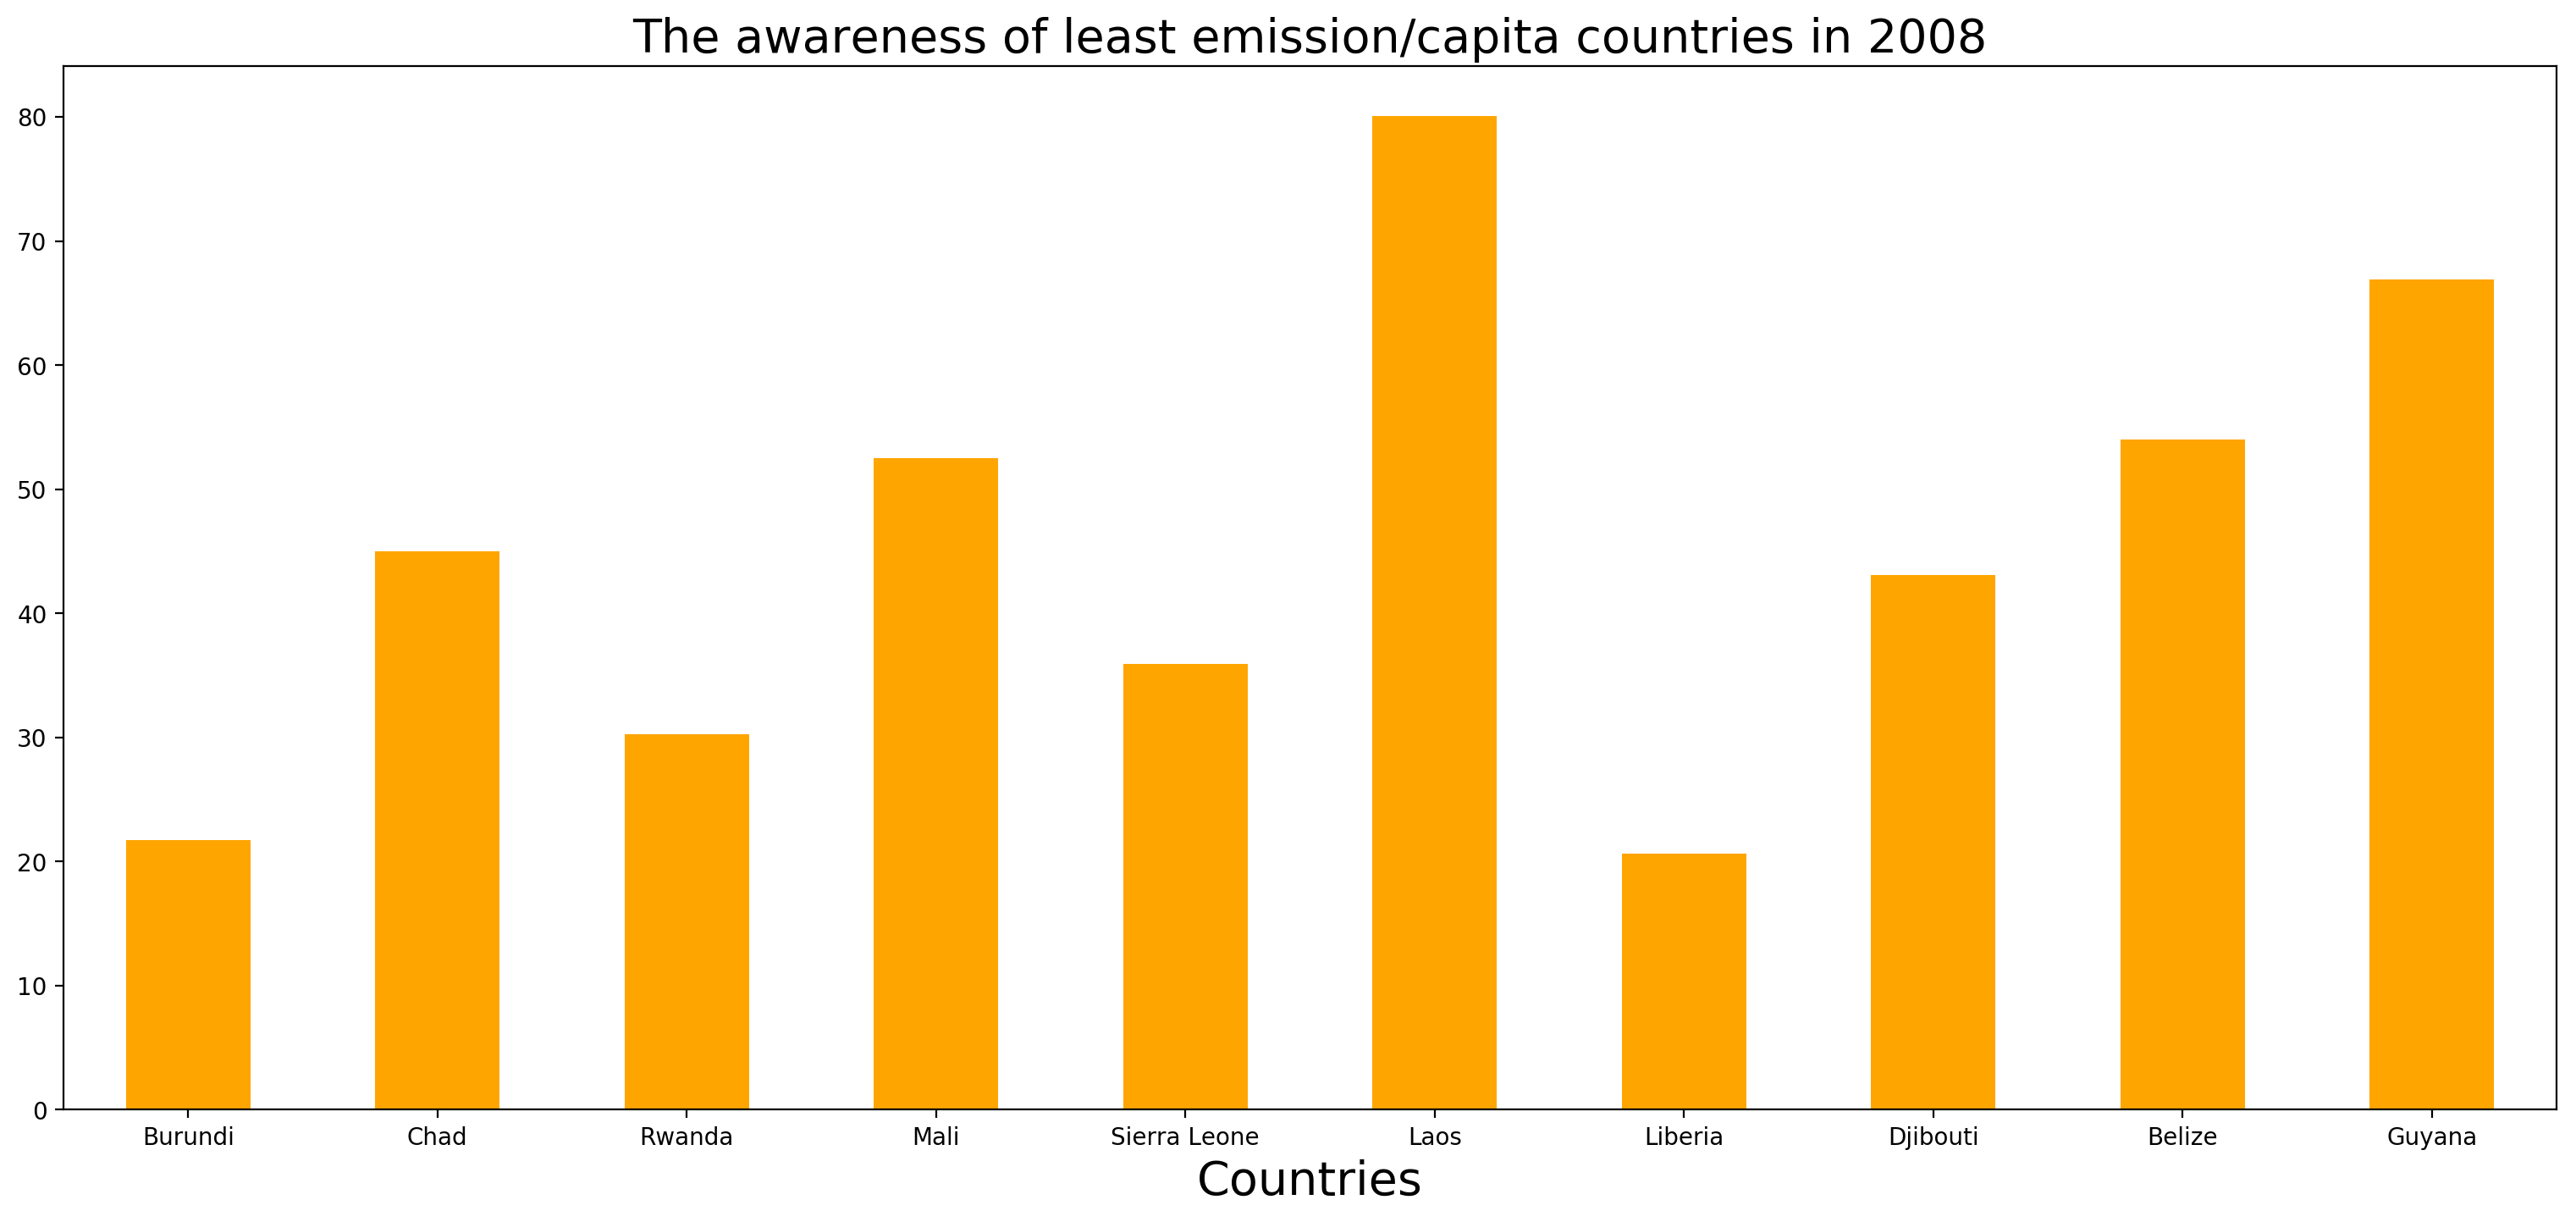

In [97]:
df_least_cemission_awareness = least_emission_awareness['Aware']
fx = df_least_cemission_awareness.plot.bar(rot=0, figsize = (19,8), color = 'orange')
plt.title('The awareness of least emission/capita countries in 2008', size = 20)
plt.xlabel('Countries', size = 20)

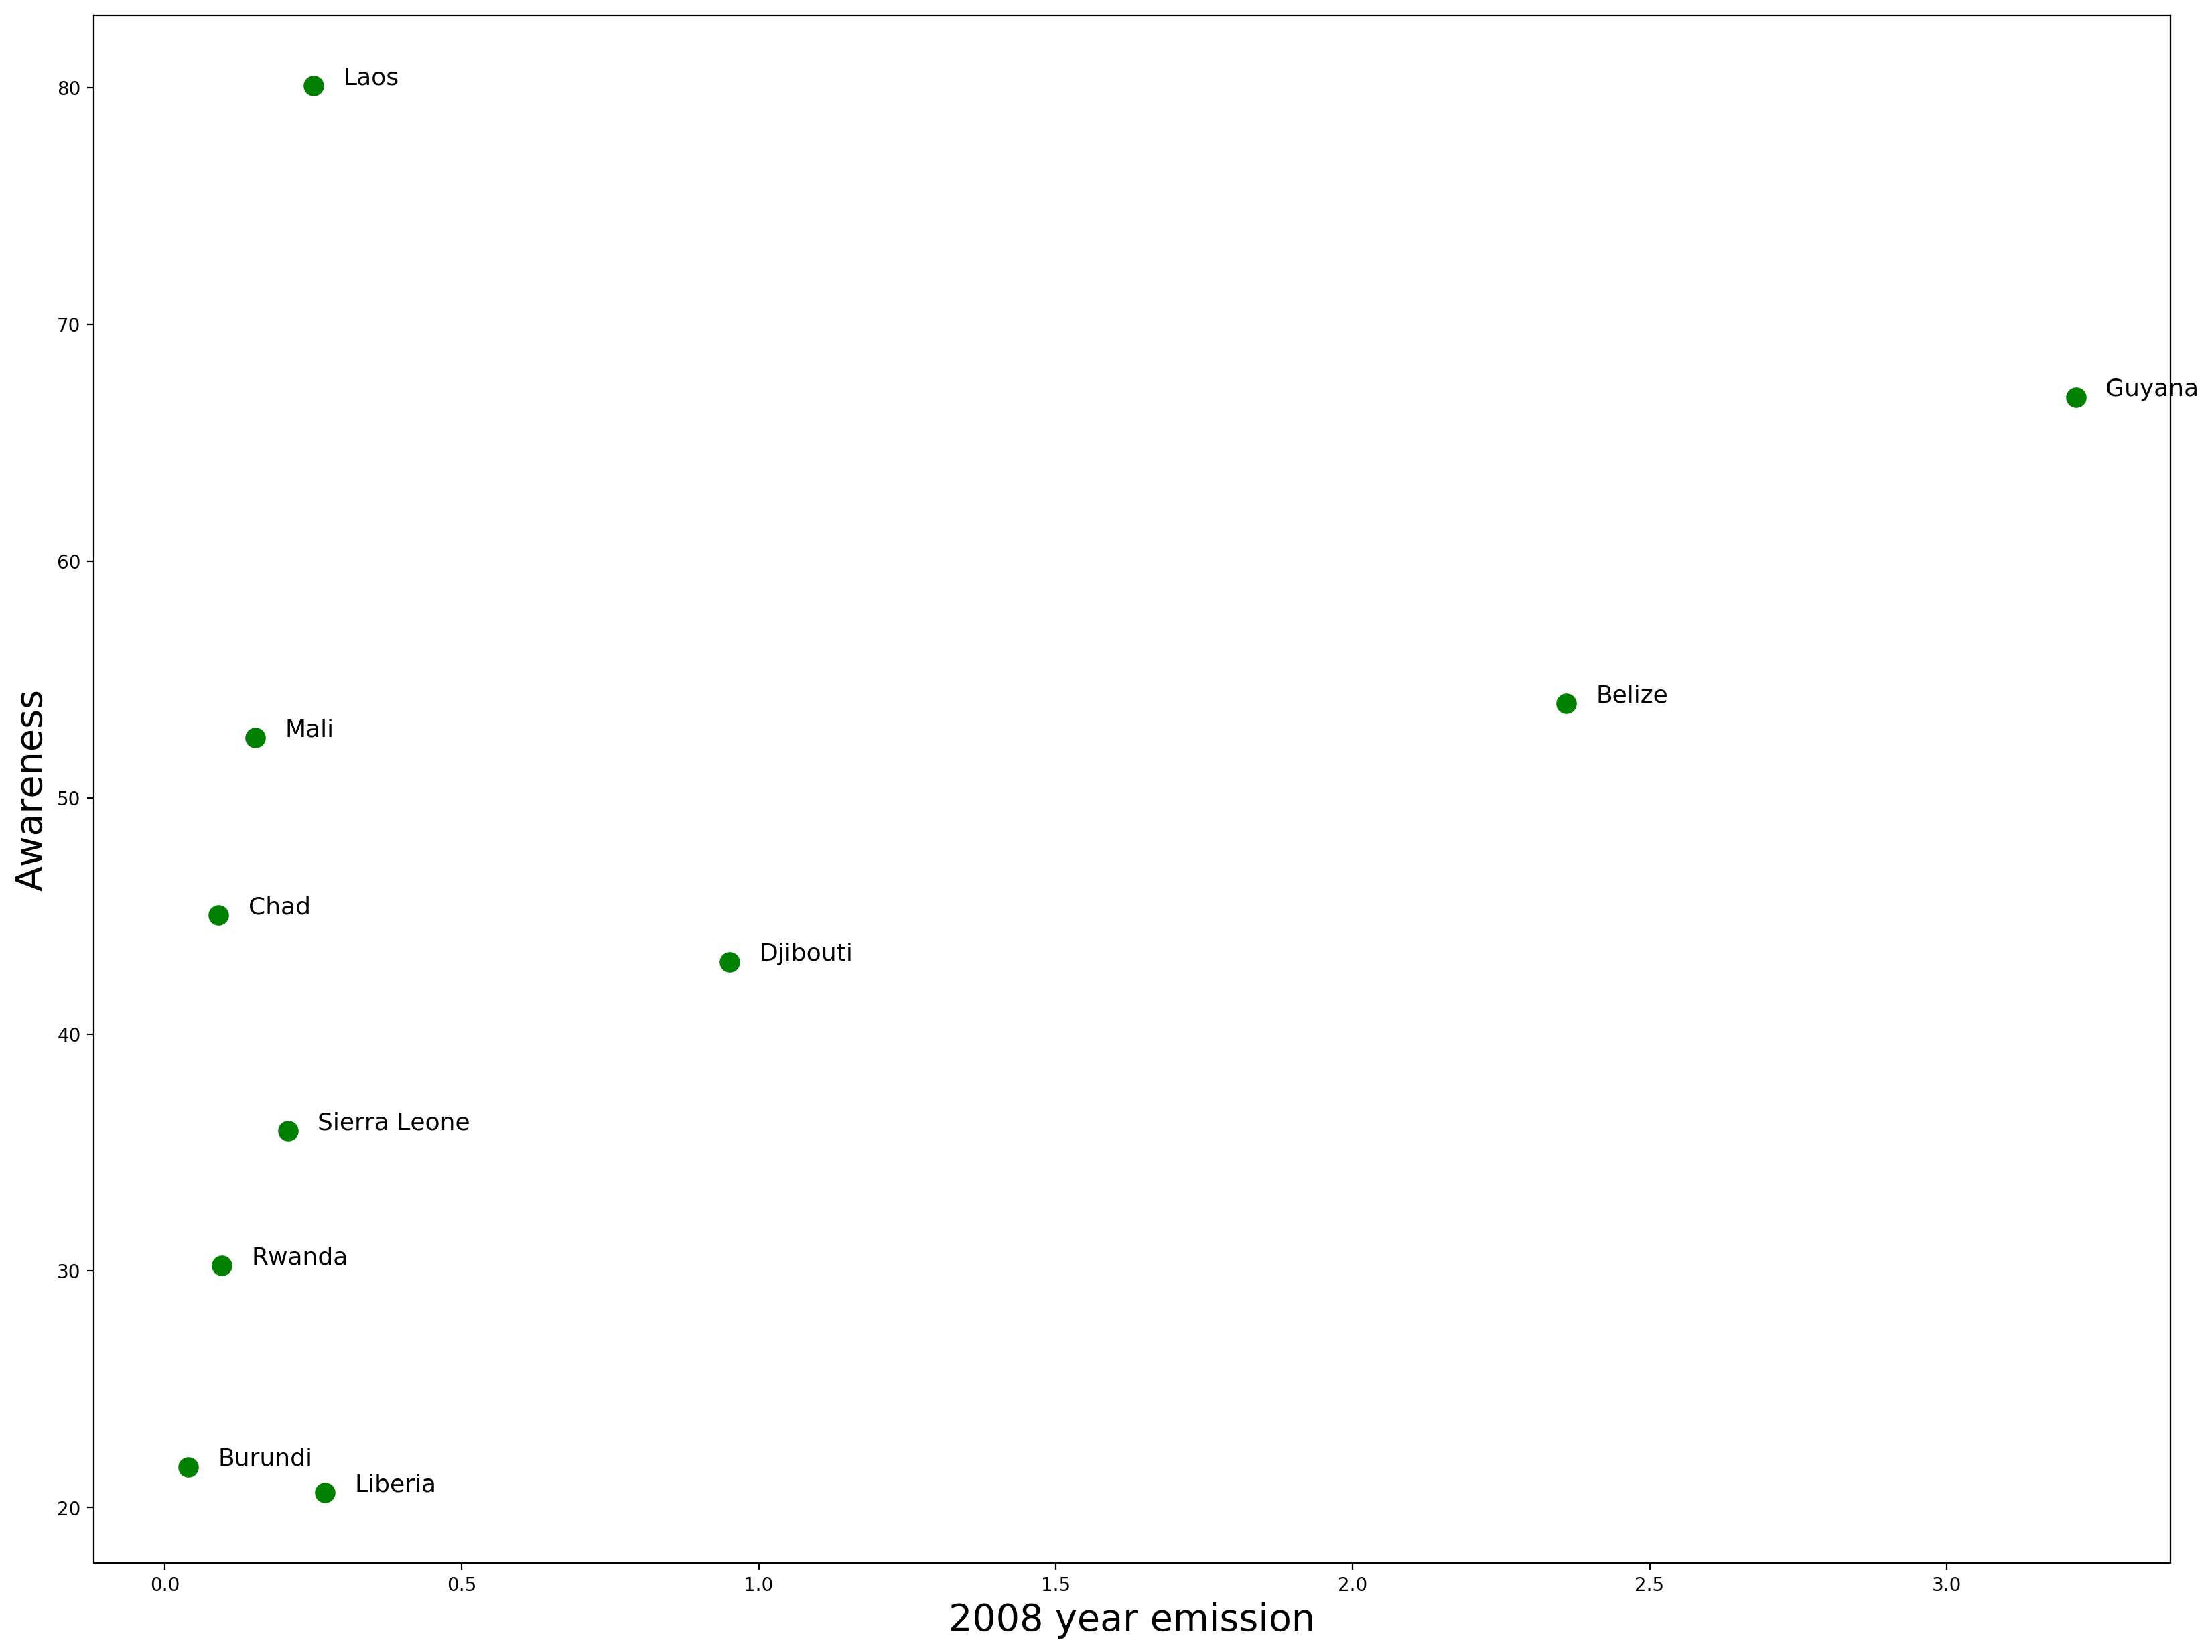

In [98]:
least_emission_awareness = least_emission_awareness.reset_index()

x = least_emission_awareness['Emission/capita']
y = least_emission_awareness['Aware']
types = least_emission_awareness['Entity']

for i,j in enumerate(types):
    x_coor = x[i]
    y_coor = y[i]
    plt.plot(x_coor, y_coor, marker = '.', color = 'green', markersize = 20)
    plt.text(x_coor+0.05, y_coor+0.05, j, fontsize = 13)
    plt.xlabel('2008 year emission', fontsize = 20)
    plt.ylabel('Awareness', fontsize = 20)
    
plt.gcf().set_size_inches((20, 15))
plt.show()

Suprisingly, when comparing the awareness of the top/least emission country, we find that the citizens in the top 10 emission countries have a higher level of being aware of the climate change than the citizens in the least emission countries. Thus, it doesn't fit in our hypothesis.

### Hypothesis \#2: In this analysis, we're wondering whether a state's political party affects their carbon dioxide emissions. We hypothesize that Democratic states are more likely to believe that climate change is happening, and that those states would thus have smaller amounts of carbon dioxide emissions. Our reasoning for this is that Republican politicians tend to outwardly deny climate change more than Democratic politicians, and there has been a recent wave among Democratic presidential candidates to deny fossil fuel money. 

#### Step \#1: First, we graph each state's CO2 emissions. 

In [ ]:
#Create a dictionary to store state-CO2 key-value pairs: 

states = df_party_state.index.values
CO2 = df_CO2_state_2014['CO2_Emissions_in_2014']
keys = states
values = CO2

CO2_states_dict = dict(zip(keys, values))
sorted_CO2_states_dict = sorted(CO2_states_dict.items(), key=operator.itemgetter(1))
#sorted_CO2_states_dict

In [ ]:
#Plot US CO2 Emissions in 2014 by State
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

States = []
CO2 = []

for state, co2 in sorted_CO2_states_dict: 
    States.append(state)
    CO2.append(co2)

y_pos = np.arange(len(States))

plt.barh(y_pos, CO2, align='center', alpha=0.5)
plt.yticks(y_pos, States)
plt.ylabel('CO2 Emissions (million metric tonnes) in 2014')
plt.title('U.S. State CO2 Emissions in 2014')

plt.show()

##### Discussion: From the above graph, we see that the state of Texas had the highest rate of CO2 emissions in 2014, with approximately 626 million metric tonnes of CO2 emissions. The second highest CO2 emissions in 2014 came from California, and the lowest amount of emissions came from the state of Vermont. 

#### Step \#2: Next, we overlay each state's political affiliation onto their CO2 emissions on the graph:

In [ ]:
#Now color code the graph based on the political affiliation of each state: 
state_party_dict = {}
for state in df_party_state.index.values:
    if float(df_party_state.at[state, 'Republican']) > float(df_party_state.at[state, 'Democrat']):
        state_party_dict[state] = 'Republican'
    else:
        state_party_dict[state] = 'Democrat'
        
#print(state_party_dict)
#print(sorted_CO2_states_dict)
        
colors = []
sorted_states_by_CO2 = [state[0] for state in sorted_CO2_states_dict]

for state in sorted_states_by_CO2: 
    if state_party_dict[state] == 'Republican':
        colors.append('red')
    else:
        colors.append('blue')

#print(colors)

In [ ]:


fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

States = []
CO2 = []

for state, co2 in sorted_CO2_states_dict: 
    if state != "District of Columbia":
        States.append(state)
        CO2.append(co2)

y_pos = np.arange(len(States))

plt.barh(y_pos, CO2, align='center', alpha=0.5, color=colors)
plt.yticks(y_pos, States)
plt.ylabel('CO2 Emissions (million metric tonnes) in 2014')
plt.title('U.S. State CO2 Emissions in 2014')

blue_patch = mpatches.Patch(color='blue',alpha=0.5, label='Democrat')
red_patch = mpatches.Patch(color='red', alpha=0.5, label='Republican')

plt.legend(handles=[blue_patch, red_patch])

plt.show()

#### Discussion: In the above graph, blue denotes majority Democratic states while red denotes Republican states in 2014. Here, we see that both the highest 4 and lowest 4  emitters of CO2 are Democratic states, which shows us that there doesn't seem to be a clear correlation between a state's CO2 emissions and their political party affiliation. However, we notice that the states with the largest amounts of CO2 emissions are also the largest states in terms of land area. Therefore, we will perform an analysis that looks at the amount of CO2 released per size of the state, by dividing CO2 emissions by the state's size in sq. miles.

#### Step \#3: Next, we divide each state's CO2 emissions by the size of each state, to get a better idea of the CO2 emission density (since larger states on average emit more CO2): 

In [ ]:
#Import a new dataset with state size in sq. miles: 
df_state_size = pd.read_csv("Datasets/2014_State_Size_Population_Density.csv")
df_state_area = df_state_size.drop(["Population", "Density (people per sq mi)"], axis = 1)

##Remove the rankings column
new_land_area = []
for x in df_state_area["Land Area (sq mi)"]:
    text = x.split()
    new_land_area.append(text[0])
      
df_state_area["Land Area (sq mi)"] = new_land_area
df_state_area


##Remove territories that aren't in previous dataset, since they aren't states:
list_not_states = []
for s,a in zip(df_state_area['State'], df_state_area["Land Area (sq mi)"]):
    if s not in States:
        #print(s)
        df_state_area = df_state_area[df_state_area.State != s]

#df_state_area


In [ ]:
#Divide CO2 emissions by state size: 
states = df_state_area['State']
areas = df_state_area['Land Area (sq mi)']
states_area_dict = dict(zip(states, areas))

CO2_div_area_states_dict = CO2_states_dict

for state in States: 
    state_area = states_area_dict[state]
    state_area = float(state_area.replace(',', ''))
    CO2_div_area_states_dict[state] = float(CO2_div_area_states_dict[state]/state_area)
    
#CO2_div_area_states_dict

In [ ]:
#Sort dictionary by CO2 emissions/state size:
sorted_CO2_div_area_states_dict = sorted(CO2_div_area_states_dict.items(), key=operator.itemgetter(1))
sorted_CO2_div_area_states_dict

#print(sorted_CO2_states_dict)
        
colors = []
sorted_states_by_CO2_div_area = [state[0] for state in sorted_CO2_div_area_states_dict]

for state in sorted_states_by_CO2_div_area: 
    if state_party_dict[state] == 'Republican':
        colors.append('red')
    else:
        colors.append('blue')

#print(colors)

In [ ]:
fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

States = []
CO2 = []

for state, co2 in sorted_CO2_div_area_states_dict: 
    if state != "District of Columbia":
        States.append(state)
        CO2.append(co2)
        #CO2.append(math.log(co2*(10**16)))

y_pos = np.arange(len(States))

plt.barh(y_pos, CO2, align='center', alpha=0.5, color=colors)
plt.yticks(y_pos, States)
plt.ylabel('CO2 Emissions (million metric tonnes) divided by state area size (sq miles) in 2014')
plt.title('U.S. State CO2 Emissions in 2014')

blue_patch = mpatches.Patch(color='blue', alpha=0.5, label='Democrat')
red_patch = mpatches.Patch(color='red', alpha=0.5, label='Republican')

plt.legend(handles=[blue_patch, red_patch])

plt.show()

#### Discussion: Here, it seems to be the case that Democratic states are actually releasing more CO2 than Republican states. Let's perform a t-test to analyze whether there is a statistical correlation between a state's political party and their CO2 emissions: 

In [ ]:
#To quantify correlation, look at mean and histogram of democratic vs. republican states:
democrat_states = []
democrat_CO2 = []
republican_states = []
republican_CO2 = []
index = 0

for state, CO2 in sorted_CO2_div_area_states_dict: 
    if colors[index] == 'blue':
        democrat_states.append(state)
        democrat_CO2.append(float(CO2))
    else:
        republican_states.append(state)
        republican_CO2.append(float(CO2))
    index = index + 1
        
democrat_CO2 = np.array(democrat_CO2)
republican_CO2 = np.array(republican_CO2)

print("democrat_CO2 mean:", democrat_CO2.mean())
print("republican_CO2 mean:", republican_CO2.mean())

print("\n")

print("democrat_CO2 variance:", democrat_CO2.var())
print("republican_CO2 variance:", republican_CO2.var())


In [ ]:
from scipy import stats
#Perform t-test:

t, two_p =stats.ttest_ind(democrat_CO2, republican_CO2, equal_var = True)
print("\n Statistics: \n")
print("\t t-statistic: ", t)
print("\t two-tailed p-value: ", two_p)

print("\n Results: \n")
if two_p < 0.05: 
    print("\t We reject the null hypothesis that the distributions are the same. A significant difference between \n the two populations was found!")
else:
    print("\t We do not reject the null hypothesis. The two distributions are the same. No significant difference was found.")

#### Analysis: After doing our t-test, we get a two-tailed p-value of 0.02. Since this is less than the critical value of alpha = 0.05,  we reject the null hypothesis that the two groups' means were the same. This means that Democratic states did signficantly release more carbon dioxide emissions than Republican states in 2014, according to these datasets. 

#### Now, we wonder: Does a state's political party affiliation has any correlation to the state population's awareness and perception of climate change?


#### Step \#4: Load in a dataset of each state's perception of climate change:

In [ ]:
df_YPCCC_2014_State_new = df_YPCCC_2014_State_new[df_YPCCC_2014_State_new.Statename != "District of Columbia"]
df_YPCCC_2014_State_new

In [ ]:
states = df_YPCCC_2014_State_new["Statename"]

happenings = df_YPCCC_2014_State_new["happening"]
states_happening_dict = dict(zip(states, happenings))

sorted_states_happening_dict = sorted(states_happening_dict.items(), key=operator.itemgetter(1))
#print(sorted_states_happening_dict)
 
sorted_states_happening_colors = []

for state, happening in sorted_states_happening_dict: 
    if state_party_dict[state] == 'Republican':
        sorted_states_happening_colors.append('red')
    else:
        sorted_states_happening_colors.append('blue')

#print(sorted_states_happening_colors)



In [ ]:

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

States = []
Happening = []

for state, hap in sorted_states_happening_dict: 
    if state != "District of Columbia":
        States.append(state)
        Happening.append(hap)

y_pos = np.arange(len(States))

plt.barh(y_pos, Happening, align='center', alpha=0.5, color=sorted_states_happening_colors)
plt.yticks(y_pos, States)
plt.xlabel('% of State Population that believes Global Warming is happening')
plt.ylabel('State')

plt.title('Correlation between State Political Party and whether that state believes Global Warming is happening')

blue_patch = mpatches.Patch(color='blue', alpha=0.5, label='Democrat')
red_patch = mpatches.Patch(color='red', alpha=0.5, label='Republican')

plt.legend(handles=[blue_patch, red_patch])

plt.show()

#### Discussion: Here, it seems to be the case that Democratic states are more aware that global warming is happening, compared to Republican states. Again, let's perform a t-test to analyze whether there is a statistical correlation between a state's political party and their CO2 emissions: 

In [ ]:
#To quantify correlation, look at mean and histogram of democratic vs. republican states:
democrat_states = []
democrat_happening = []
republican_states = []
republican_happening = []
index = 0

for state, hap in sorted_states_happening_dict: 
    if sorted_states_happening_colors[index] == 'blue':
        democrat_states.append(state)
        democrat_happening.append(float(hap))
    else:
        republican_states.append(state)
        republican_happening.append(float(hap))
    index = index + 1
        
democrat_happening = np.array(democrat_happening)
republican_happening = np.array(republican_happening)

print("democrat_happening mean:", democrat_happening.mean())
print("republican_happening mean:", republican_happening.mean())

print("\n")

print("democrat_happening variance:", democrat_happening.var())
print("republican_happening variance:", republican_happening.var())


In [ ]:
#Perform t-test:

t, two_p =stats.ttest_ind(democrat_happening, republican_happening, equal_var = False)
print("\n Statistics: \n")
print("\t t-statistic: ", t)
print("\t two-tailed p-value: ", two_p)

print("\n Results: \n")
if two_p < 0.05: 
    print("\t We reject the null hypothesis that the distributions are the same. A significant difference between \n the two populations was found!")
else:
    print("\t We do not reject the null hypothesis. The two distributions are the same. No significant difference was found.")

#### Analysis: Here, we again reject the null hypothesis that the two distributions are the same, which means that there was a statistical correlation between political affiliation and whether or not a population believed global warming was happening in 2014, based on these datasets. From this result, we can say that overall, democratic states are more likely  than populations in republican states to believe that global warming is happening. 


### Conclusion of Analysess: 

#### While Democratic states appear to emit more CO2 than Republican states in 2014, they also appear to be more aware that climate change is happening, which seems contradictory. This causes us to believe that there may be compounding variables that we have not considered in our analysis. What could explain why states who are more aware that global warming is happening still release more carbon dioxide? For future work, we may want to look at a state's GDP as a potential compounding factor. 

# Ethics & Privacy

Common ethical considerations in research include concerns of privacy, consent and
beneficence. Privacy and authorship are ensured in our study as all of the datasets we have
decided to use are publicly available and have been anonymized. These data are mainly about
national carbon emissions and anonymous individual opinions on climate change, which are then
grouped based on their geographic location. The final aima of this research is to promote an
awareness of climate change, which we believe would be advantageous to anyone who could
potentially be affected by this research.

One ethical concern we do have is that in being American and doing this study at a
university in the United States, we inherently bring a western perspective of climate change to the
analysis of other countries. We will need to be mindful of any inherent bias we have with this
perspective, and actively work to mitigate it by understanding that there are geographic and
cultural differences which shape an individual’s perception, awareness of, and response to climate
change. We may be able to avoid this bias by doing qualitative research of climate change
perceptions in various non-Western countries.

# Conclusion & Discussion

*Fill in your discussion information here*